### Clear GPU

In [ ]:
from keras import backend as K

K.clear_session()

### Check GPU



In [ ]:
import tensorflow as tf

# List all GPUs TensorFlow detects
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("TensorFlow detected the following GPU(s):")
    for gpu in gpus:
        details = tf.config.experimental.get_device_details(gpu)
        print(f"Name: {details['device_name']}")

### Check Tensorflow and Keras Version


In [ ]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

### Import all the libraries

In [ ]:
# Set seed for reproducibility
seed = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(seed)
random.seed(seed)

# Import TensorFlow and Keras
import tensorflow as tf
import keras as tfk
from keras import layers as tfkl
from keras import regularizers

# Set seed for TensorFlow
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Reduce TensorFlow verbosity
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Print TensorFlow version
print(tf.__version__)

# Import other libraries
import requests
from io import BytesIO
import cv2
from PIL import Image
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

num_classes = 8

### Create a function to Load Data and load the datasets needed


In [ ]:
def load_data(path):
    # Load dataset with TensorFlow Datasets, obtaining dataset info

    data = np.load(path)
    train_dataset = data['images']
    test_dataset= data['labels']

    train_dataset = train_dataset[:11959]
    test_dataset = test_dataset[:11959]

    return (train_dataset,test_dataset)

In [ ]:
# Execute function and load data
(X_test, y_test) = load_data("training_set.npz")

print("Test set shape (images):", X_test.shape)
print("Test set shape (labels):", y_test.shape)

In [ ]:
# Execute function and load data
(X_test_aug, y_test_aug) = load_data("augmented_set.npz")

print("Test set shape (images):", X_test_aug.shape)
print("Test set shape (labels):", y_test_aug.shape)

In [ ]:
# Execute function and load data
(X_test_aug2, y_test_aug2) = load_data("augmented_set2.npz")

print("Test set shape (images):", X_test_aug2.shape)
print("Test set shape (labels):", y_test_aug2.shape)


In [ ]:

# One-hot Encoding
y_test_aug2 = tf.keras.utils.to_categorical(y_test_aug2, num_classes=num_classes)

In [ ]:
# Execute function and load data
(X_test_aug3, y_test_aug3) = load_data("augmented_set3.npz")

print("Test set shape (images):", X_test_aug3.shape)
print("Test set shape (labels):", y_test_aug3.shape)

In [ ]:
# Execute function and load data
(X_test_aug4, y_test_aug4) = load_data("augmented_set4.npz")

print("Test set shape (images):", X_test_aug4.shape)
print("Test set shape (labels):", y_test_aug4.shape)

In [ ]:

# One-hot Encoding
y_test_aug4 = tf.keras.utils.to_categorical(y_test_aug4, num_classes=num_classes)

In [ ]:
# Create different type of concatenations of the datasets
X_test_concat = np.concatenate((X_test, X_test_aug), axis=0)
y_test_concat = np.concatenate((y_test, y_test_aug), axis=0)

In [ ]:
# Concatenate datasets 
X_test_concat2 = np.concatenate((X_test_concat, X_test_aug2), axis=0)
y_test_concat2 = np.concatenate((y_test_concat, y_test_aug2), axis=0)

# One-hot Encoding
y_test_concat2 = tf.keras.utils.to_categorical(y_test_concat2, num_classes=num_classes)

In [ ]:
# Concatenate datasets
X_test_concat3 = np.concatenate((X_test_concat, X_test_aug3), axis=0)
y_test_concat3 = np.concatenate((y_test_concat, y_test_aug3), axis=0)

# One-hot Encoding
y_test_concat3 = tf.keras.utils.to_categorical(y_test_concat3, num_classes=num_classes)

In [ ]:
# Concatenate datasets -> All the datasets were made by me 
X_test_concat_d = np.concatenate((X_test_aug, X_test_aug3), axis=0)
y_test_concat_d = np.concatenate((y_test_aug, y_test_aug3), axis=0)
X_test_concat_d = np.concatenate((X_test_concat_d, X_test_aug4), axis=0)
y_test_concat_d = np.concatenate((y_test_concat_d, y_test_aug4), axis=0)

# One-hot Encoding
y_test_concat_d = tf.keras.utils.to_categorical(y_test_concat_d, num_classes=num_classes)

In [ ]:
# One-hot Encoding
y_test_aug = tf.keras.utils.to_categorical(y_test_aug, num_classes=num_classes)

# One-hot Encoding
y_test_aug3 = tf.keras.utils.to_categorical(y_test_aug3, num_classes=num_classes)

# One-hot Encoding
y_test_aug4 = tf.keras.utils.to_categorical(y_test_aug4, num_classes=num_classes)

# One-hot Encoding
y_test_concat = tf.keras.utils.to_categorical(y_test_concat, num_classes=num_classes)

# One-hot Encoding
y_test_concat2 = tf.keras.utils.to_categorical(y_test_concat2, num_classes=num_classes)

In [ ]:
# One-hot Encoding
y_test_aug3 = tf.keras.utils.to_categorical(y_test_aug3, num_classes=num_classes)

### Define The First - Model

In [ ]:
# Initialise MobileNetV3Small model with pretrained weights, for transfer learning
mobilenet = tf.keras.applications.EfficientNetV2B3(
    include_top=False,
    input_shape=(96, 96, 3),
    weights="imagenet",
    input_tensor=None,
    pooling=False,
    classes=8,
    classifier_activation="softmax",
    name="efficientnetv2-b3",
)


# Display a summary of the model architecture
mobilenet.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
# Specify 'to_file' argument with a path where you have write permissions
tfk.utils.plot_model(mobilenet, to_file='/tmp/model.png', expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

In [ ]:
# Freeze all layers in MobileNetV3Small to use it solely as a feature extractor
mobilenet.trainable = False

# Define input layer with shape matching the input images
inputs = tfk.Input(shape=(96, 96, 3), name='input_layer')

"""
# Definisci il pipeline completo di augmentazione
augmentation = tf.keras.Sequential([
    # Altre augmentazioni indipendenti
    tfkl.RandomCrop(height=96, width=96),  # Regola la dimensione del crop se necessario
    tfkl.RandomFlip("horizontal_and_vertical"),
    tfkl.RandomRotation(0.3),
    tfkl.Dropout(0.1),
    tfkl.Dropout(0.2),
    tfkl.RandomContrast(0.3),
    tfkl.RandomZoom(0.15),
    tfkl.RandomBrightness(0.1),
], name='advanced_preprocessing')


#Apply the augmentation pipeline
inputs = augmentation(inputs)
"""

# Pass augmented inputs through the MobileNetV3Small feature extractor
x = mobilenet(inputs)

x = tfkl.GlobalAveragePooling2D(name='avg_pool')(x)

# Add a batch normalization layer
x = tfkl.BatchNormalization(name='batch_norm')(x)

# Add a dropout layer for regularization
x = tfkl.Dropout(0.3, name='dropout')(x)

# Add a dense layer with 256 units and GELU activation
x = tfkl.Dense(256, activation='gelu', name='dense1')(x)


# Add layer normalization
x = tfkl.LayerNormalization(name='layer_norm1')(x)

# Add another dropout layer
x = tfkl.Dropout(0.3, name='dropout2')(x)

# Add a second dense layer with 128 units and GELU activation
x = tfkl.Dense(128, activation='gelu', name='dense2')(x)

# Add layer normalization
x = tfkl.LayerNormalization(name='layer_norm2')(x)

# Add another dropout layer
x = tfkl.Dropout(0.2, name='dropout3')(x)

# Add a third dense layer with 128 units and GELU activation
x = tfkl.Dense(128, activation='gelu', name='dense3')(x)
'''
# Add layer normalization
x = tfkl.LayerNormalization(name='layer_norm3')(x)

# Add another dropout layer
x = tfkl.Dropout(0.3, name='dropout4')(x)
'''
# Add final Dense layer for classification with softmax activation
outputs = tfkl.Dense(8, activation='softmax', name='output')(x)

# Define the complete model linking input and output
tl_model = tfk.Model(inputs=inputs, outputs=outputs, name='model')

# Compile the model with categorical cross-entropy loss and Adam optimiser
tl_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics=['accuracy'])

# Display a summary of the model architecture
tl_model.summary(expand_nested=True)

### Train First - Model


In [ ]:
# Train the model
tl_history = tl_model.fit(
    x=X_test_concat3,
    y=y_test_concat3,
    batch_size=64,
    epochs=7,
    validation_data=(X_test_aug2 , y_test_aug2),
    callbacks=[tfk.callbacks.EarlyStopping(
        monitor='val_accuracy', 
        mode='max', patience=20,
        restore_best_weights=True
        )]
).history

# Calculate and print the best validation accuracy achieved
final_val_accuracy = round(max(tl_history['val_accuracy']) * 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file, including final accuracy in the filename
model_filename = 'Blood_Cells_MobileNetV3S_' + str(final_val_accuracy) + '.keras'
tl_model.save(model_filename)

del tl_model

### Test the First - Model


In [ ]:
# Generate predictions on the test set and print a classification report
y_pred = tl_model.predict(X_test_aug3)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels
y_test_classes = y_test_aug3.argmax(axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

### Fine Tuning


In [ ]:
# Re-load the model after transfer learning
ft_model = tfk.models.load_model('Blood_Cells_MobileNetV3S_50.49.keras')
#ft_model = tfk.models.load_model('Blood_Cells_MobileNetV3S_'+ str(final_val_accuracy) + '.keras')

# Display a summary of the model architecture
ft_model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
#tfk.utils.plot_model(ft_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

In [ ]:
# Set the MobileNetV3Small model layers as trainable
ft_model.get_layer('efficientnetv2-b3').trainable = True

# Set all MobileNetV3Small layers as non-trainable
for layer in ft_model.get_layer('efficientnetv2-b3').layers:
    layer.trainable = False

# Enable training only for Conv2D and DepthwiseConv2D layers
for i, layer in enumerate(ft_model.get_layer('efficientnetv2-b3').layers):
    if isinstance(layer, tf.keras.layers.Conv2D) or isinstance(layer, tf.keras.layers.DepthwiseConv2D):
        layer.trainable = True
        print(i, layer.name, type(layer).__name__, layer.trainable)

In [ ]:
# Set the number of layers to freeze
N = 100

# Set the first N layers as non-trainable
for i, layer in enumerate(ft_model.get_layer('efficientnetv2-b3').layers[:N]):
    layer.trainable = False

# Print layer indices, names, and trainability status
for i, layer in enumerate(ft_model.get_layer('efficientnetv2-b3').layers):
    print(i, layer.name, layer.trainable)

# Display a summary of the model architecture
ft_model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
tfk.utils.plot_model(ft_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

In [ ]:
# Compile the model
ft_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(1e-4), metrics=['accuracy'])

In [ ]:
# Fine-tune the model
ft_history = ft_model.fit(
    x = X_test_concat_d,
    y = y_test_concat_d,
    batch_size = 32,
    epochs = 6,
    validation_data = (X_test_aug2, y_test_aug2),
    callbacks = [tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=20, restore_best_weights=True)]
).history

# Calculate and print the final validation accuracy
final_val_accuracy = round(max(ft_history['val_accuracy'])* 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file with the accuracy included in the filename
model_filename = 'Blood_Cells_MobileNetV3S_'+str(final_val_accuracy)+'.keras'
ft_model.save(model_filename)

del ft_model

In [ ]:
# Re-load the model after transfer learning
ft_model = tfk.models.load_model('Blood_Cells_MobileNetV3S_76.17.keras')
#ft_model = tfk.models.load_model('Blood_Cells_MobileNetV3S_'+ str(final_val_accuracy) + '.keras')

# Display a summary of the model architecture
ft_model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
#tfk.utils.plot_model(ft_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

In [ ]:
# Set the MobileNetV3Small model layers as trainable
ft_model.get_layer('efficientnetv2-b3').trainable = True

# Set all MobileNetV3Small layers as non-trainable
for layer in ft_model.get_layer('efficientnetv2-b3').layers:
    layer.trainable = False

# Enable training only for Conv2D and DepthwiseConv2D layers
for i, layer in enumerate(ft_model.get_layer('efficientnetv2-b3').layers):
    if isinstance(layer, tf.keras.layers.Conv2D) or isinstance(layer, tf.keras.layers.DepthwiseConv2D):
        layer.trainable = True
        print(i, layer.name, type(layer).__name__, layer.trainable)

In [ ]:
# Set the number of layers to freeze
N = 124

# Set the first N layers as non-trainable
for i, layer in enumerate(ft_model.get_layer('efficientnetv2-b3').layers[:N]):
    layer.trainable = False

# Print layer indices, names, and trainability status
for i, layer in enumerate(ft_model.get_layer('efficientnetv2-b3').layers):
    print(i, layer.name, layer.trainable)

# Display a summary of the model architecture
ft_model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
tfk.utils.plot_model(ft_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

In [ ]:
# Compile the model
ft_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(1e-4), metrics=['accuracy'])

In [ ]:
# Fine-tune the model
ft_history = ft_model.fit(
    x = X_test_concat2,
    y = y_test_concat2,
    batch_size = 32,
    epochs = 3,
    validation_data = (X_test_aug4, y_test_aug4),
    callbacks = [tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=20, restore_best_weights=True)]
).history

# Calculate and print the final validation accuracy
final_val_accuracy = round(max(ft_history['val_accuracy'])* 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file with the accuracy included in the filename
model_filename = 'Blood_Cells_MobileNetV3S_'+str(final_val_accuracy)+'.keras'
ft_model.save(model_filename)


In [ ]:
# Re-load the model after transfer learning
ft_model = tfk.models.load_model('Blood_Cells_MobileNetV3S_96.76.keras')
#ft_model = tfk.models.load_model('Blood_Cells_MobileNetV3S_'+ str(final_val_accuracy) + '.keras')

# Display a summary of the model architecture
ft_model.summary(expand_nested=True)


In [ ]:
# Generate predictions on the test set and print a classification report
y_pred = ft_model.predict(X_test_aug3[:500])
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels
y_test_classes = y_test_aug3[:500].argmax(axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
ko
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
ko
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
ko
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
ko
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
ko
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
ko
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
ko
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
ko
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
ko
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
ko
1/1 ━━━━━━━━━━━━━━━━

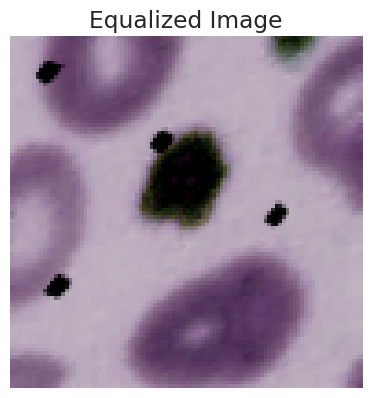

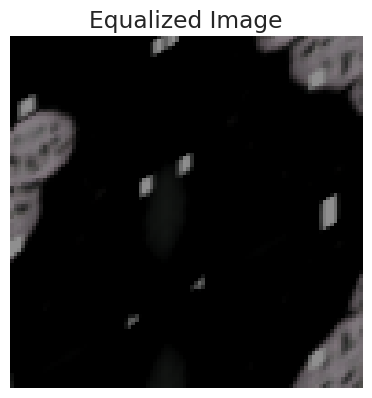

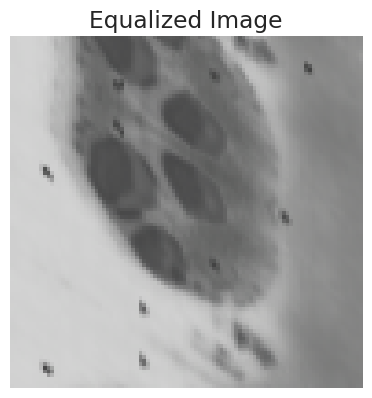

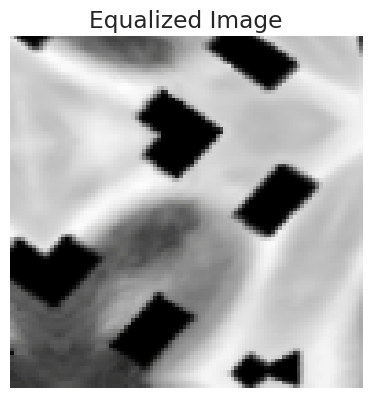

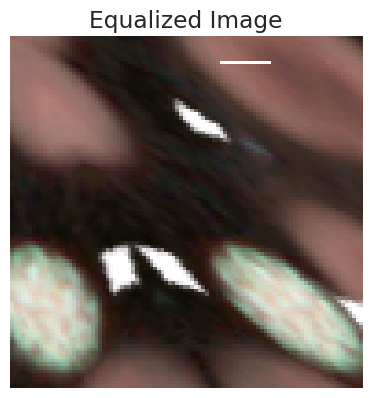

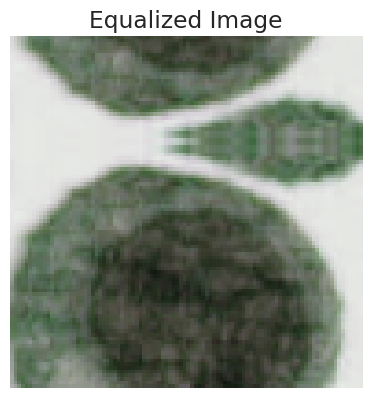

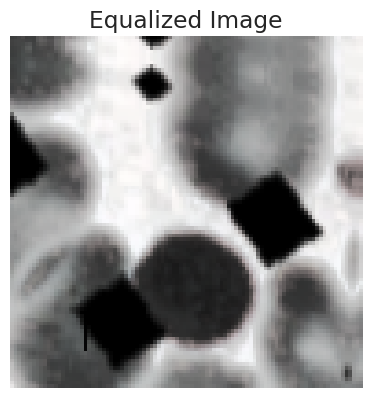

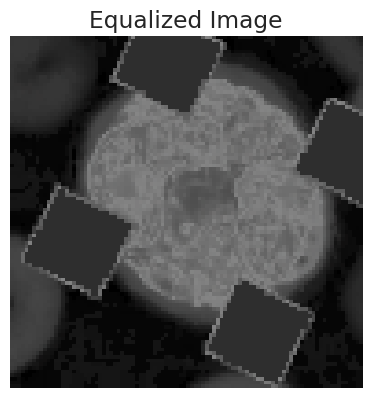

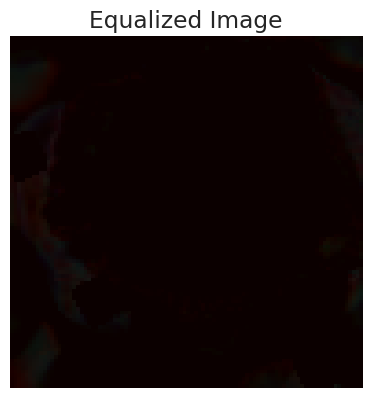

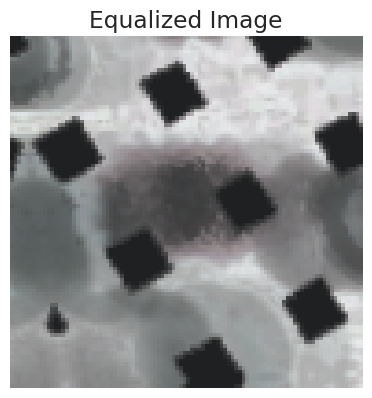

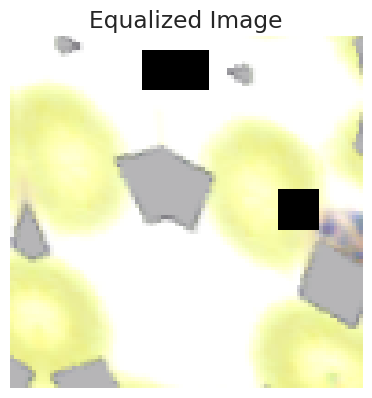

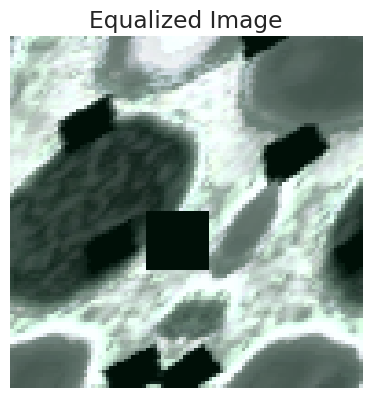

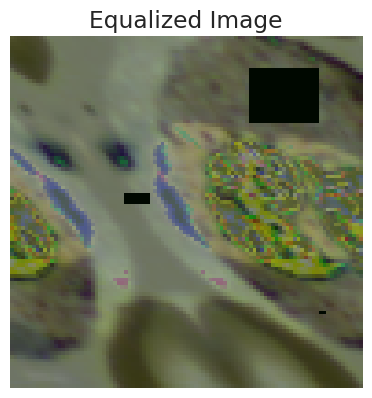

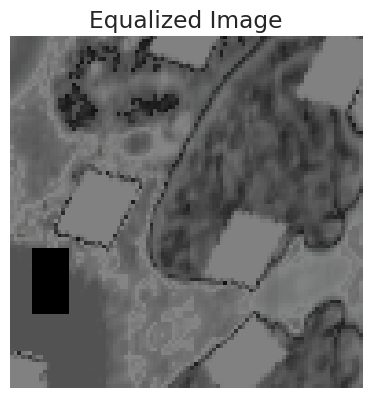

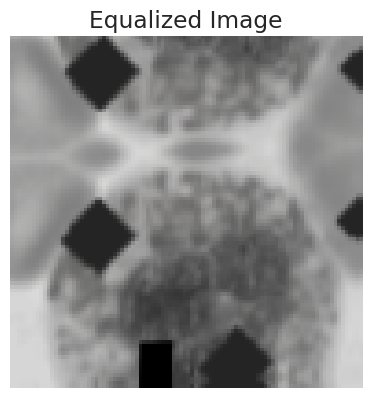

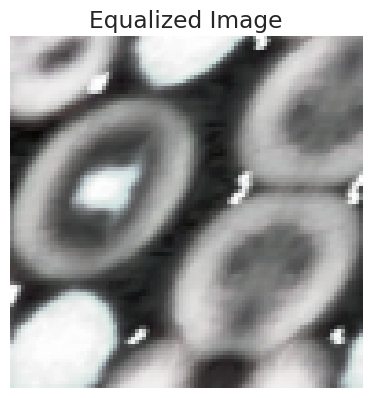

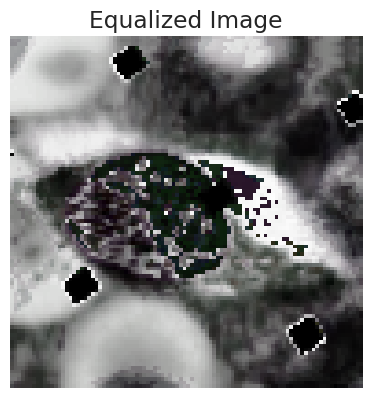

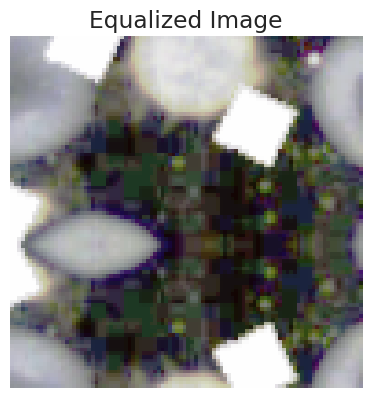

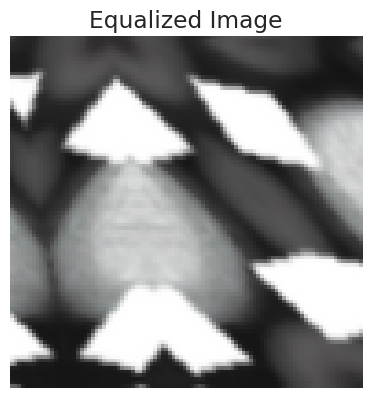

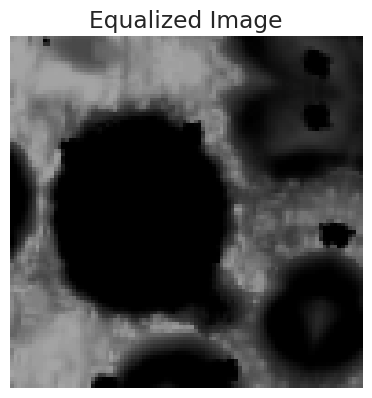

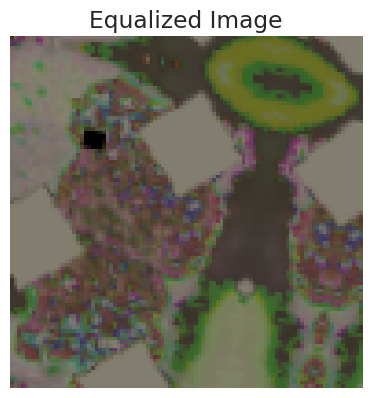

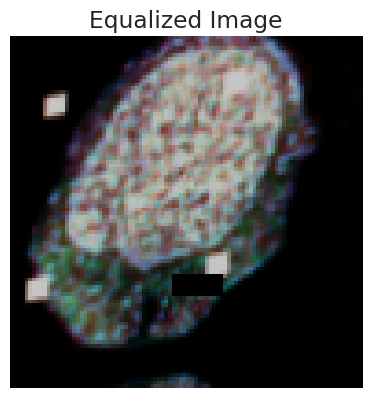

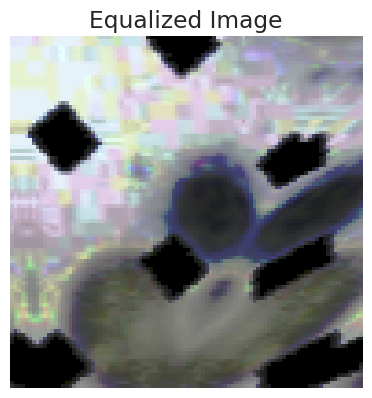

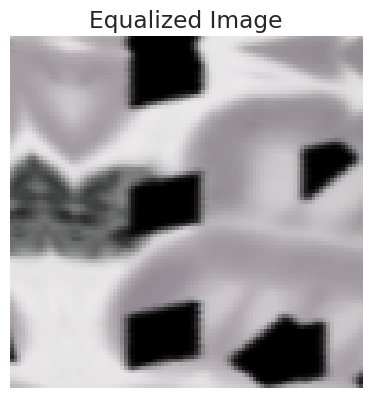

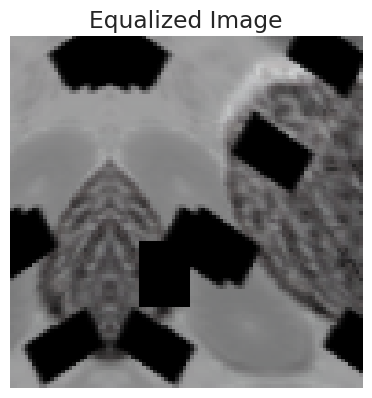

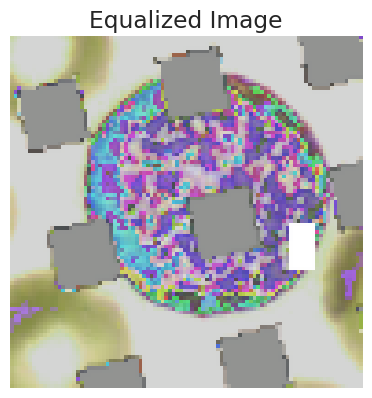

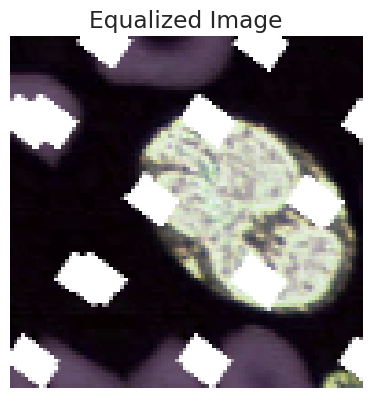

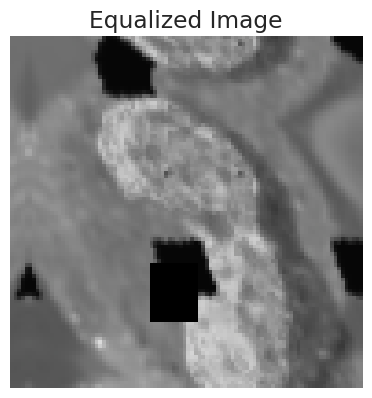

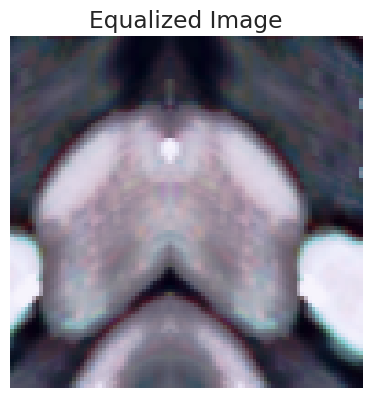

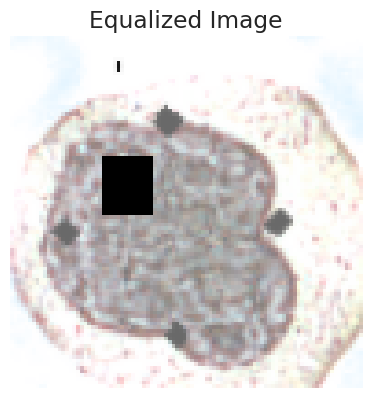

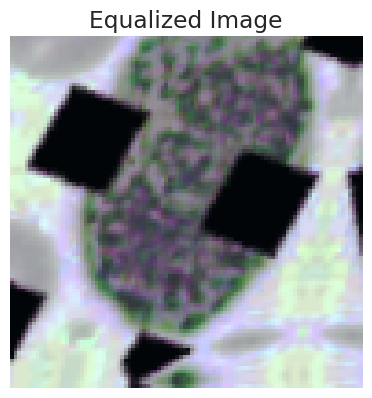

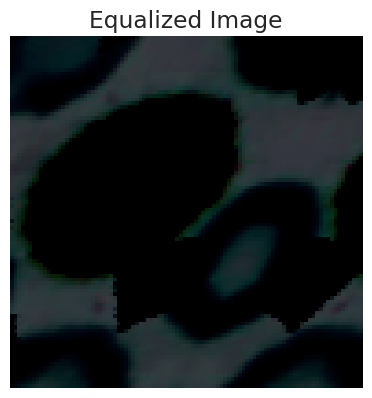

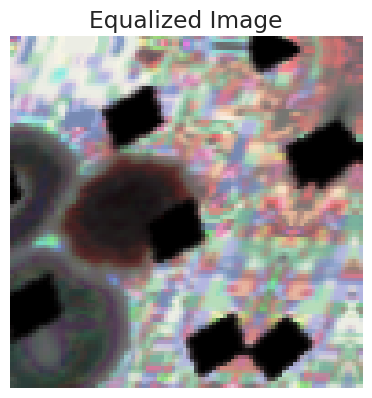

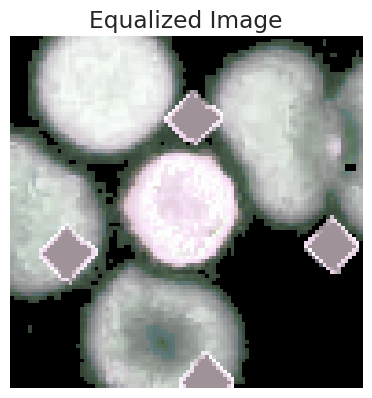

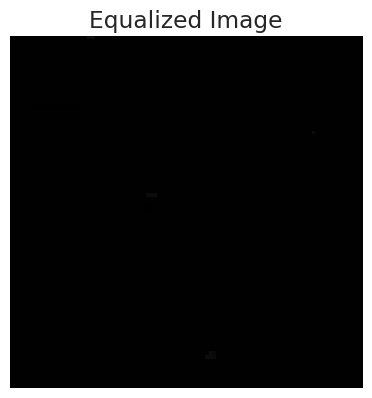

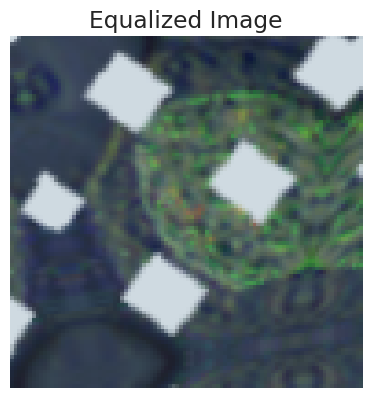

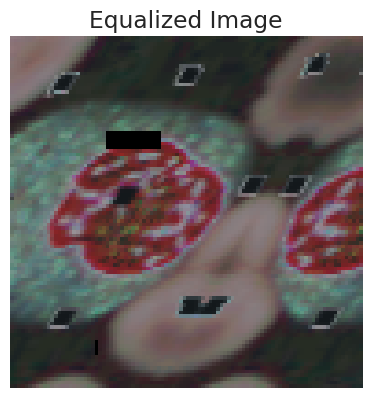

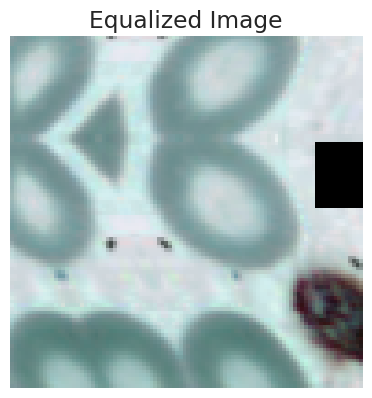

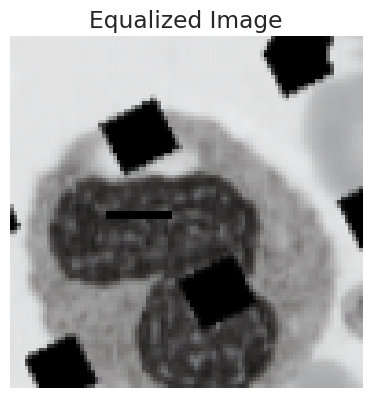

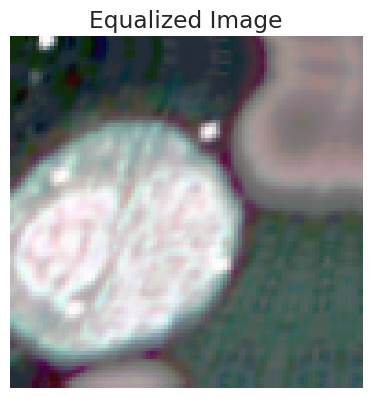

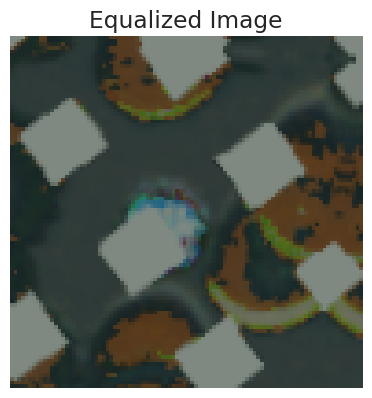

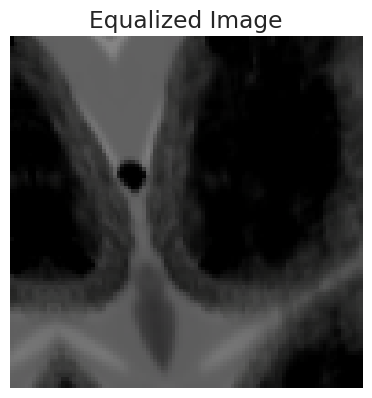

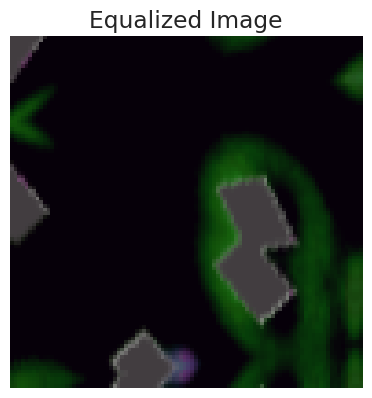

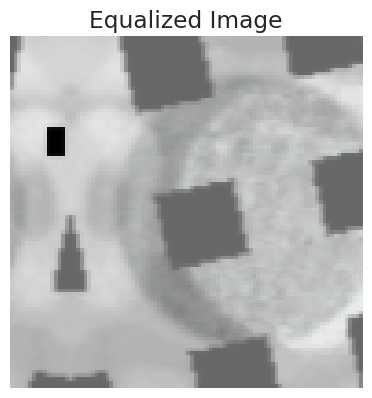

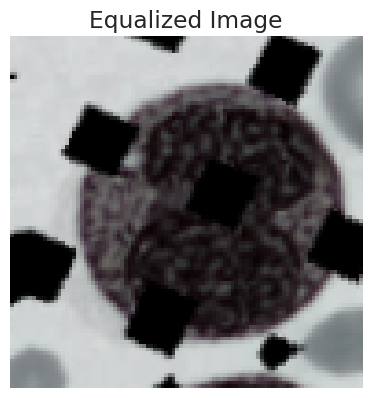

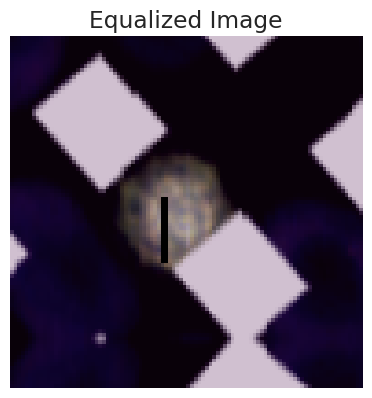

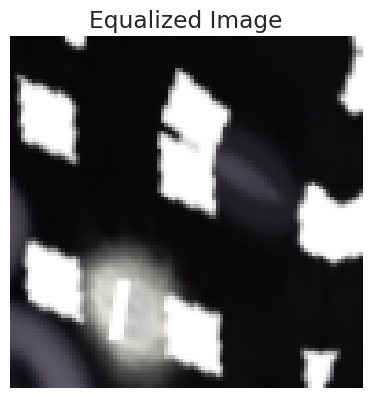

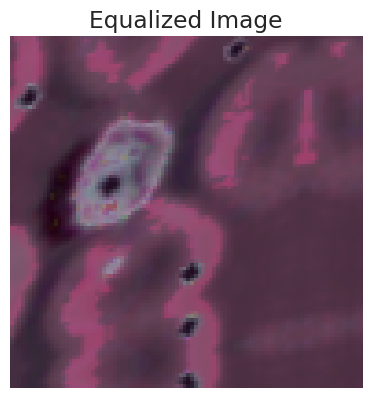

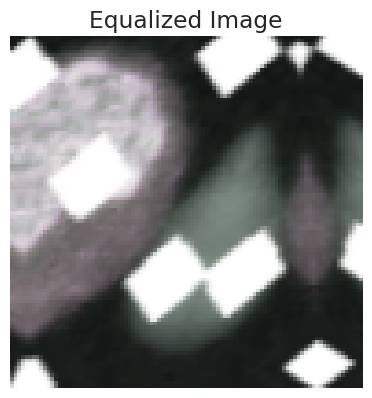

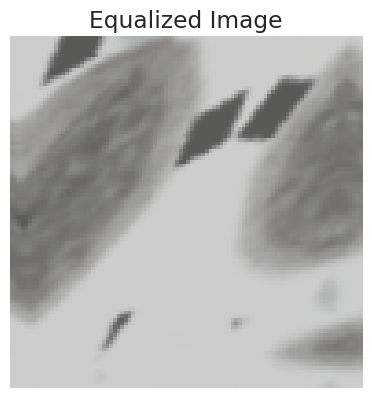

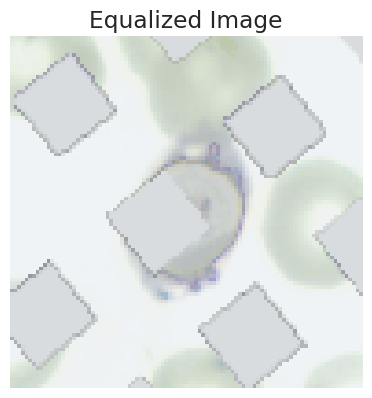

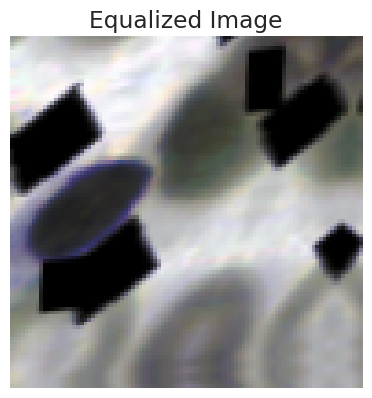

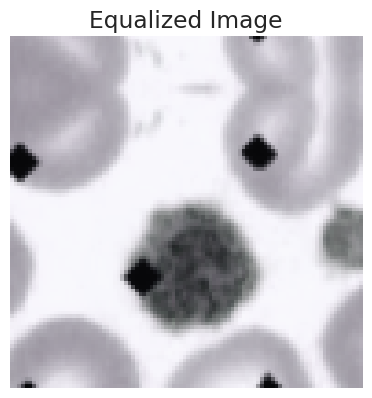

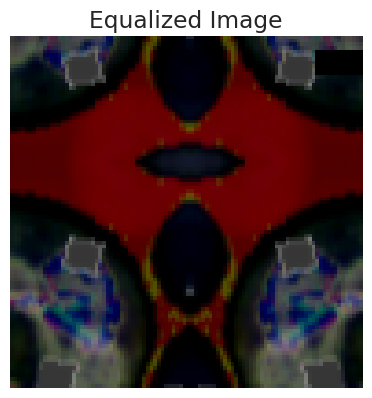

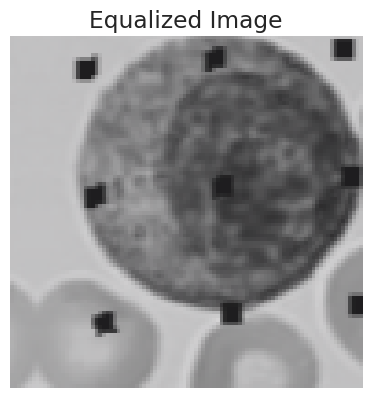

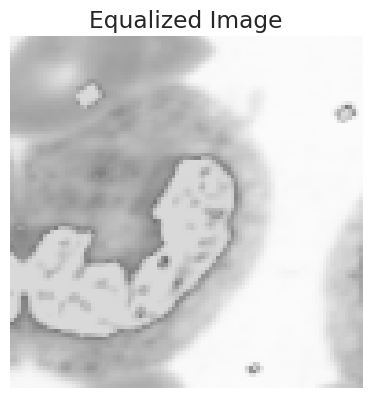

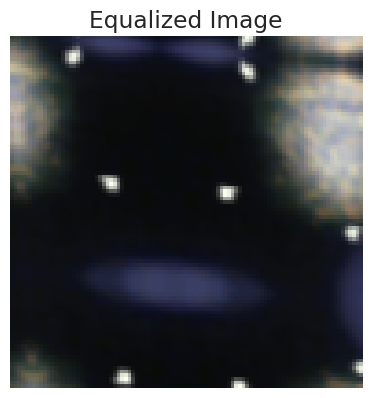

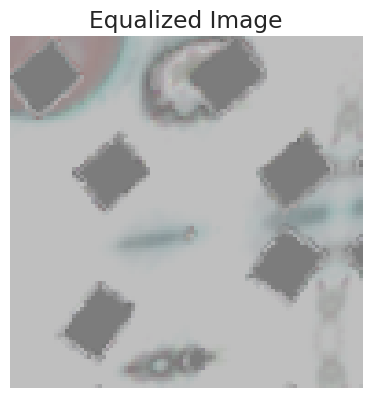

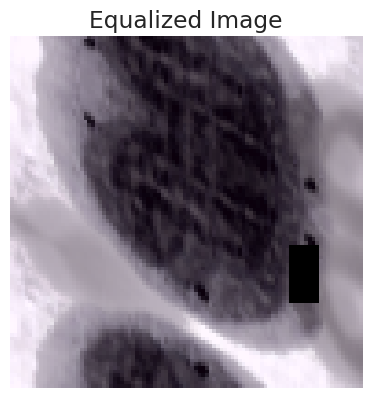

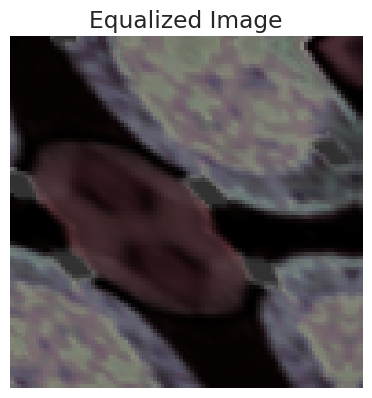

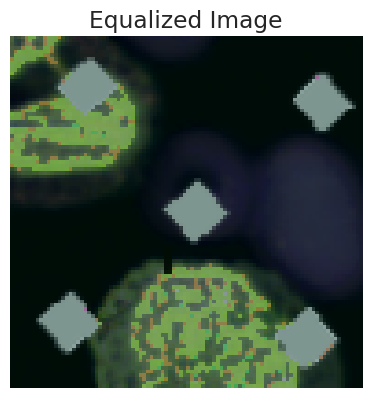

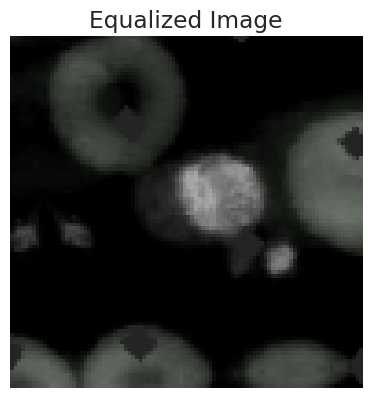

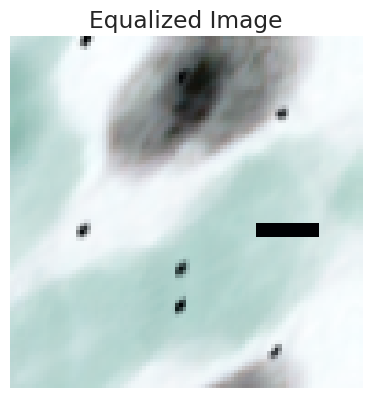

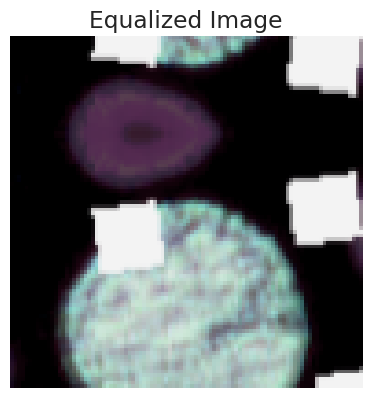

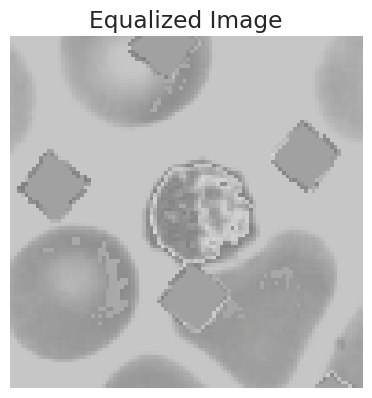

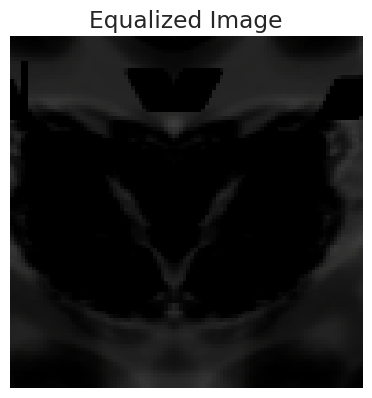

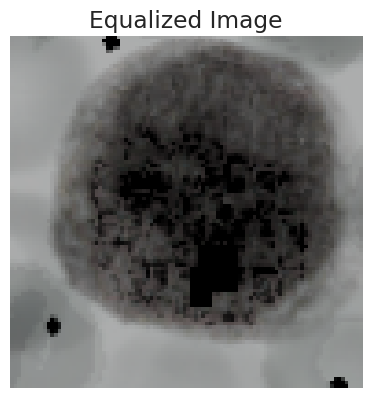

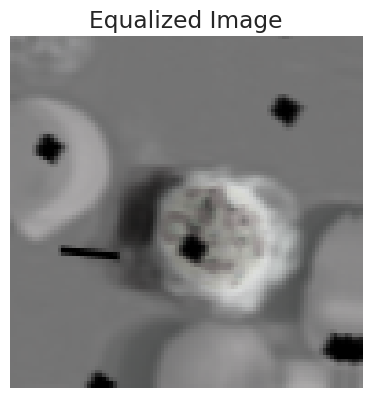

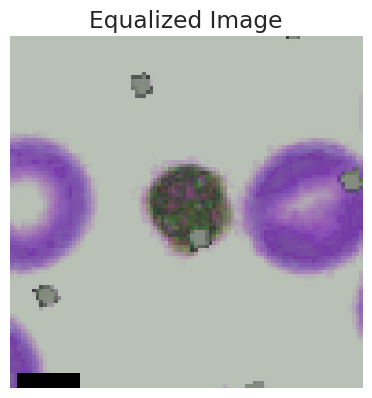

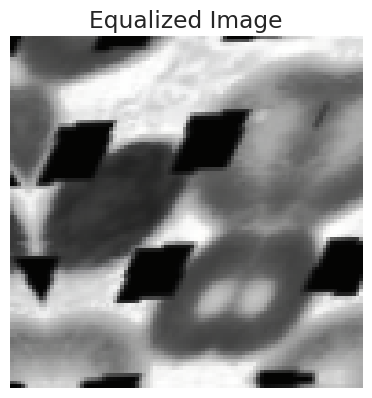

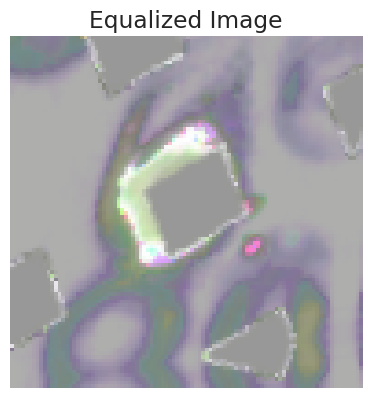

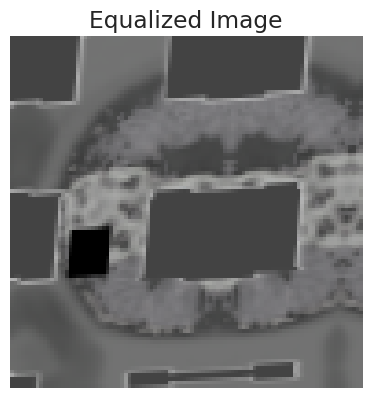

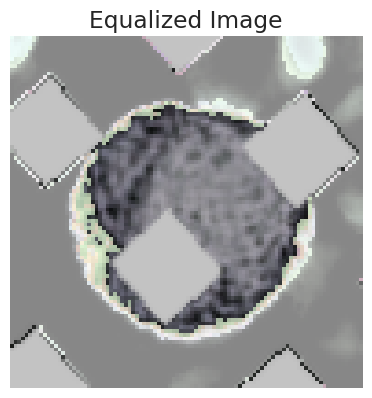

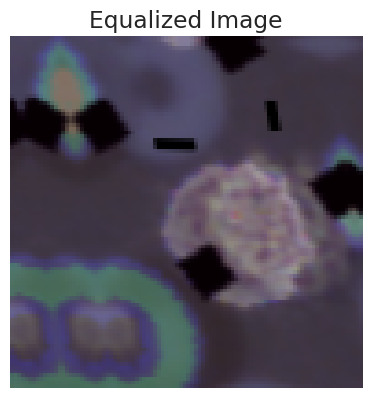

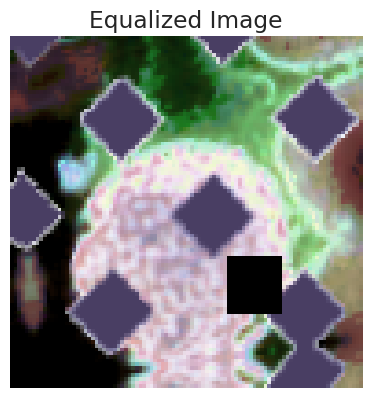

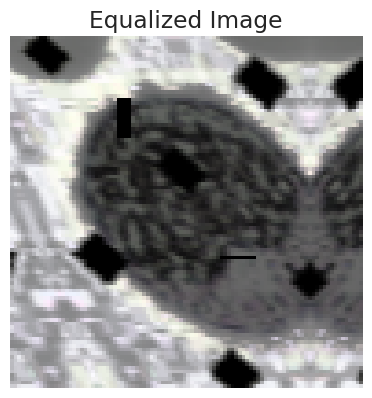

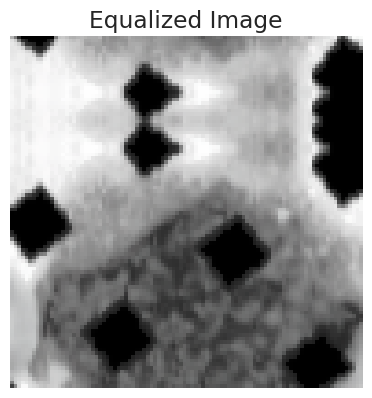

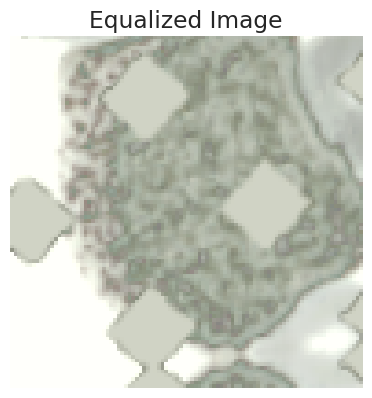

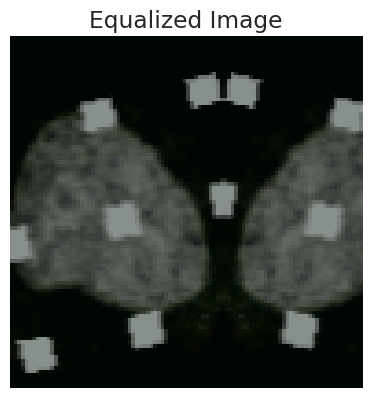

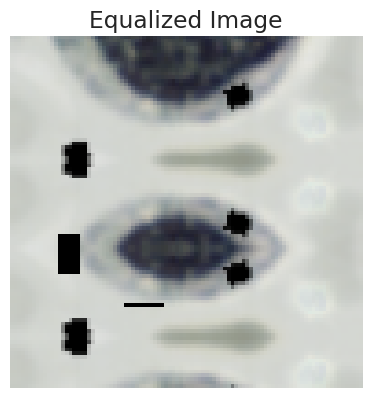

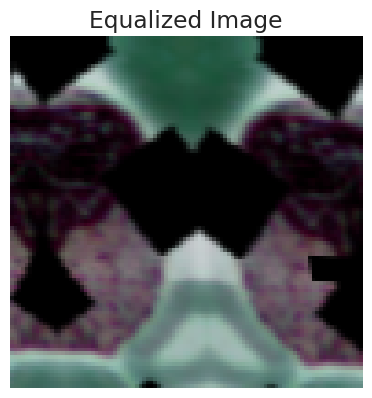

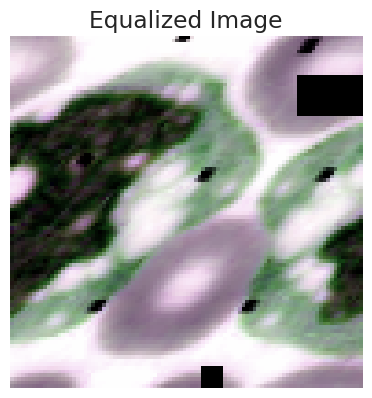

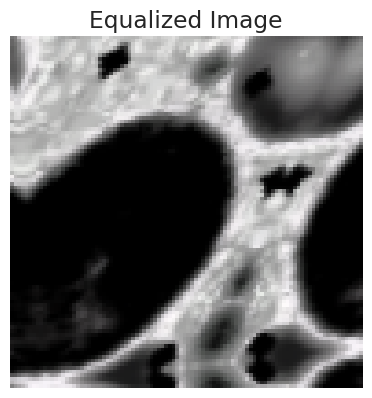

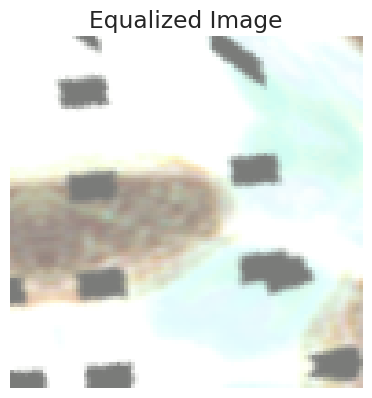

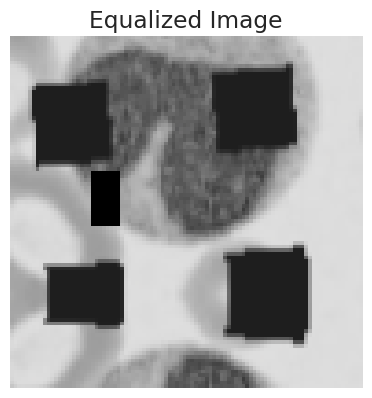

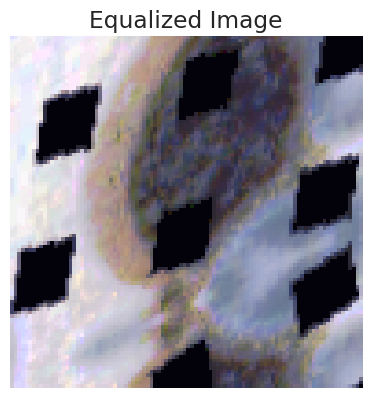

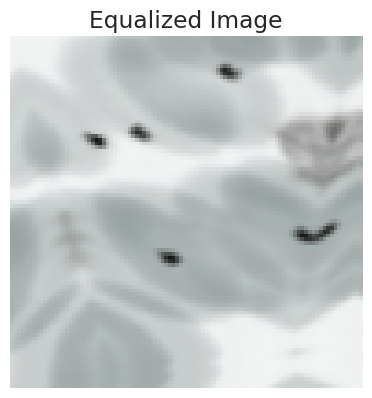

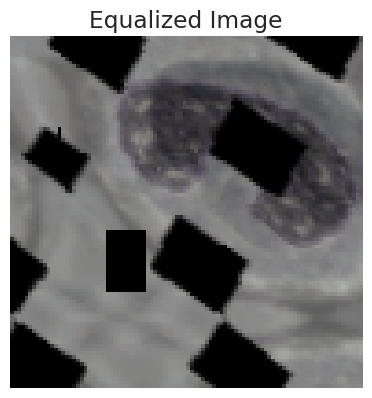

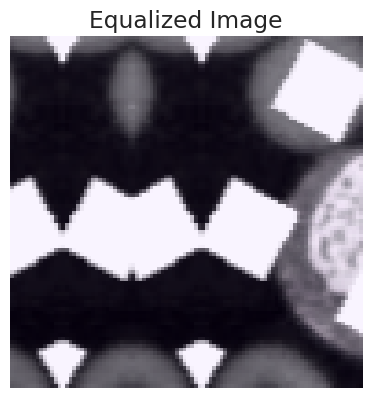

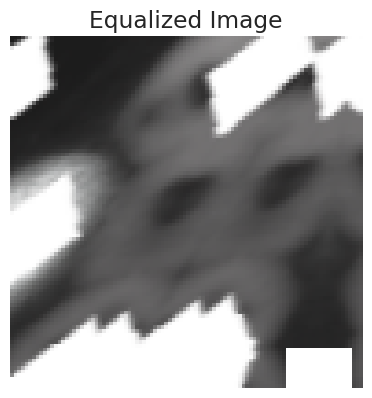

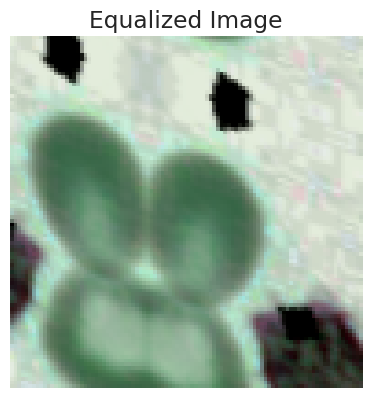

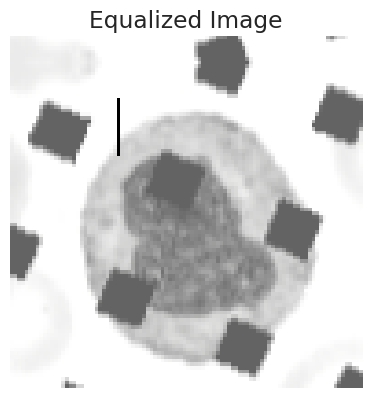

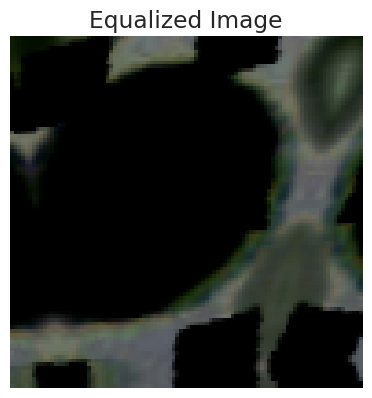

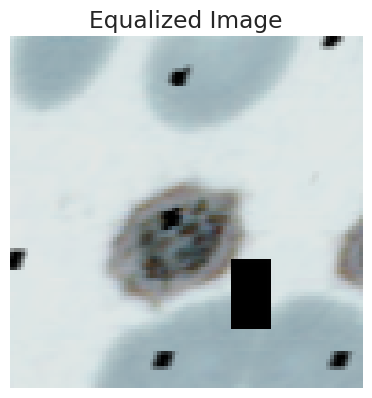

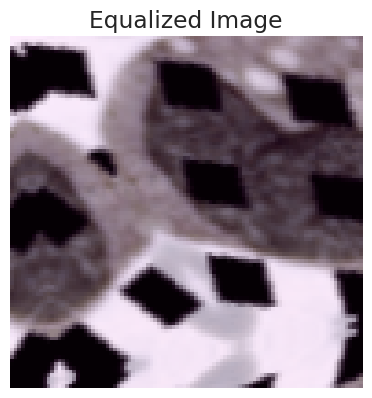

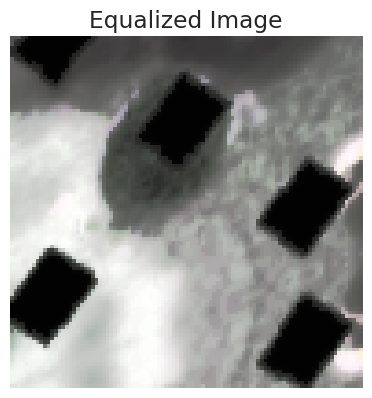

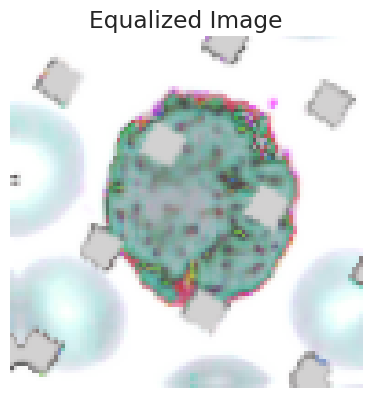

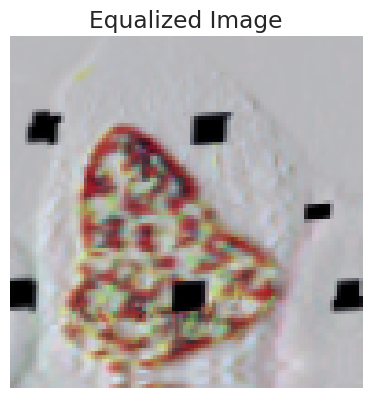

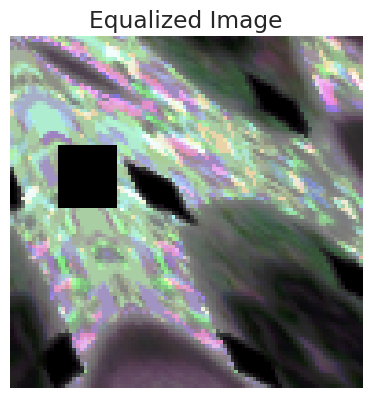

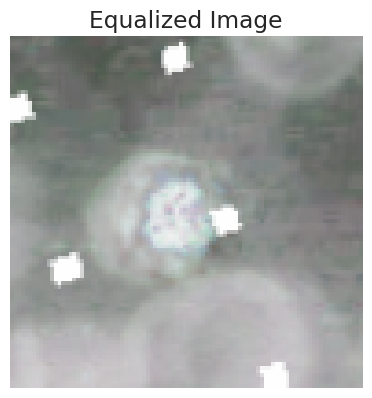

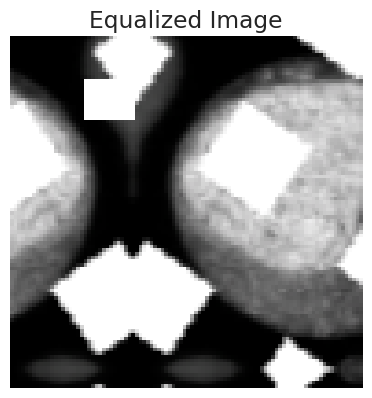

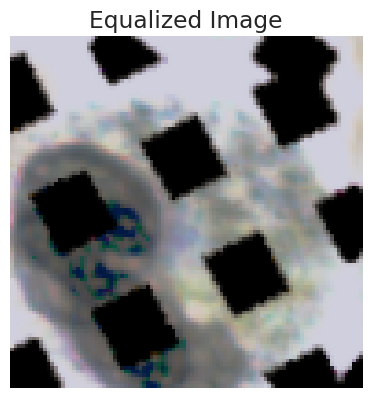

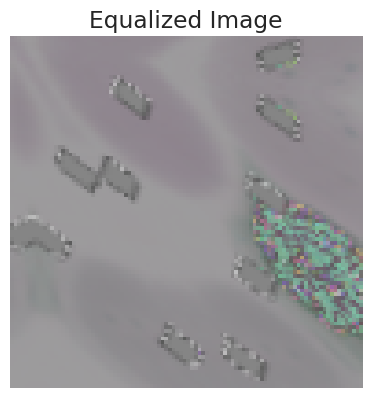

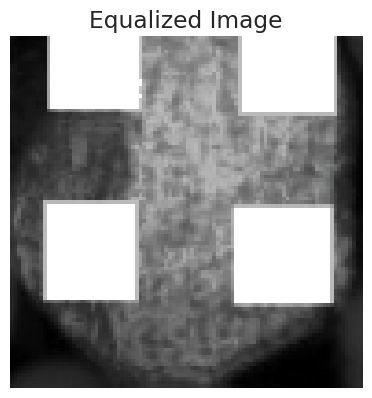

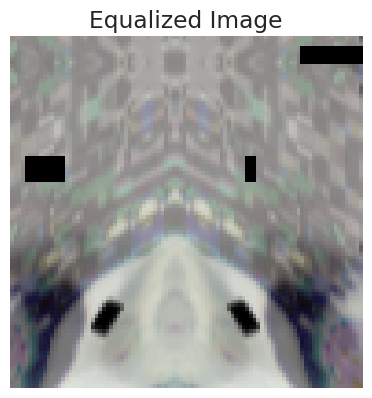

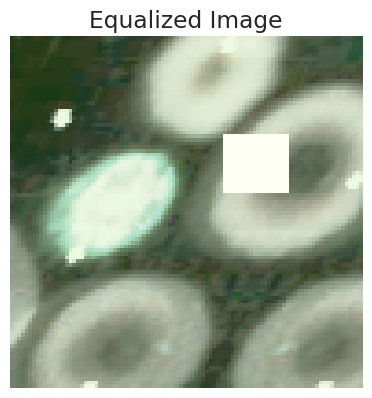

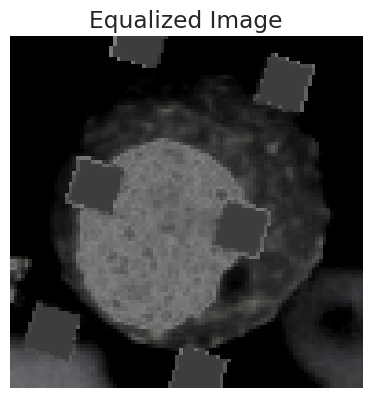

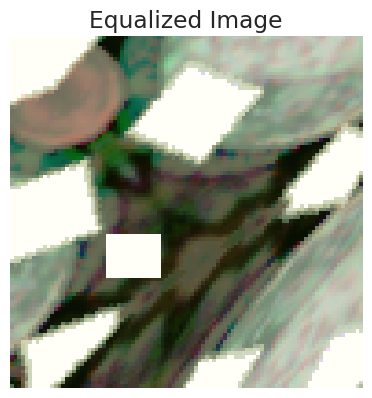

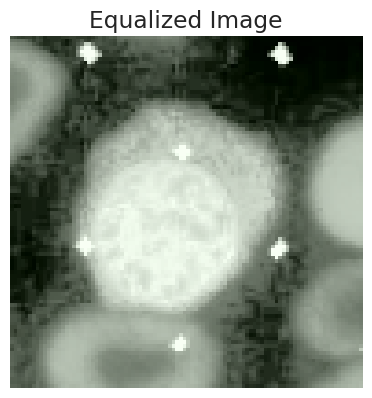

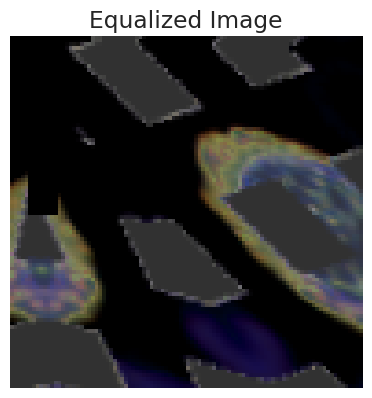

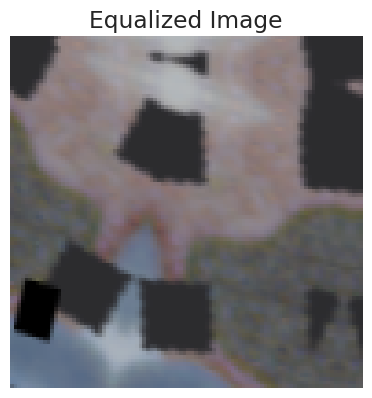

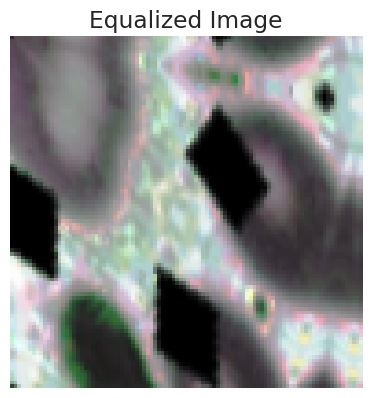

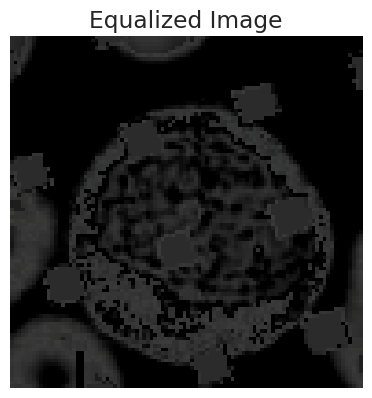

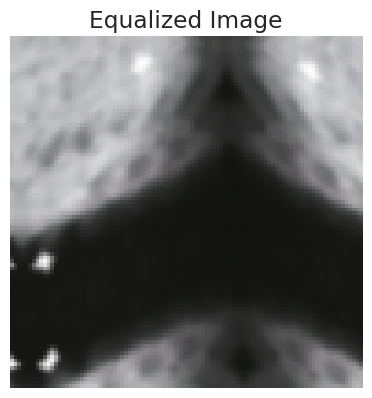

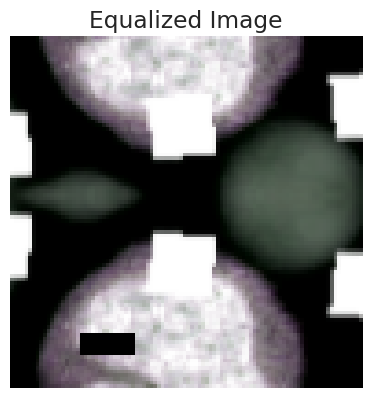

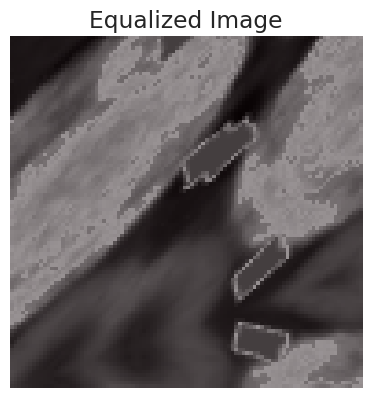

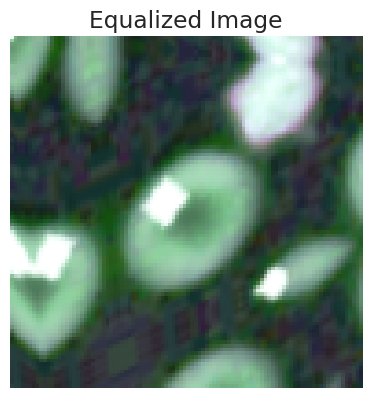

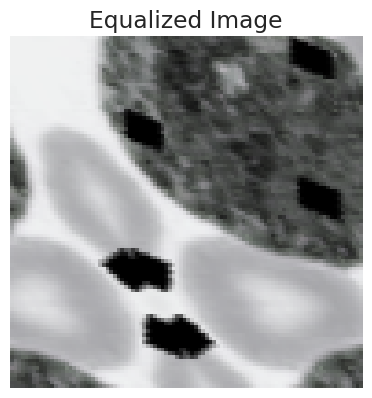

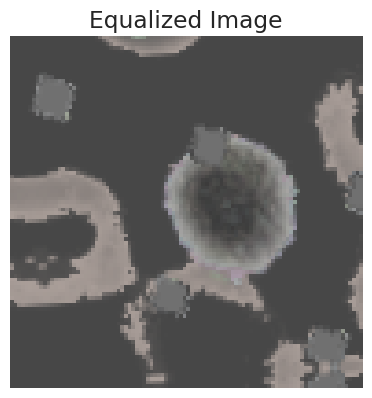

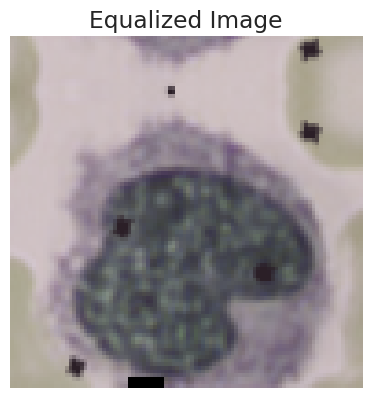

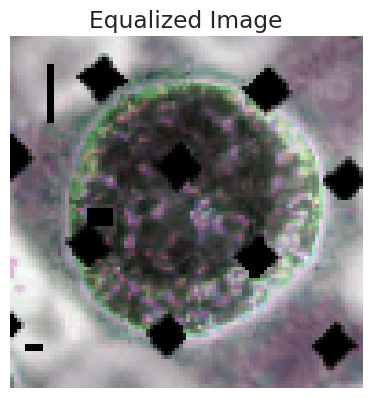

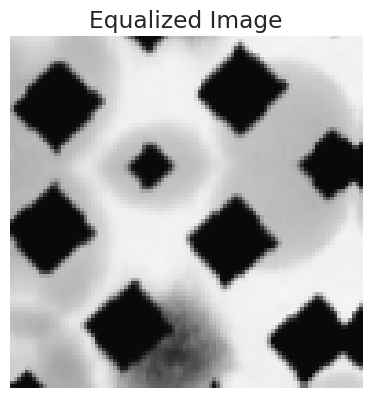

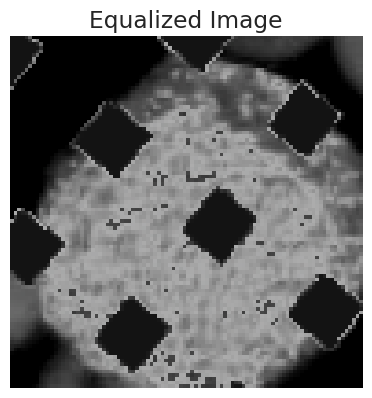

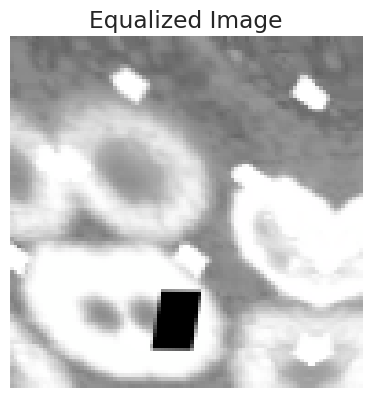

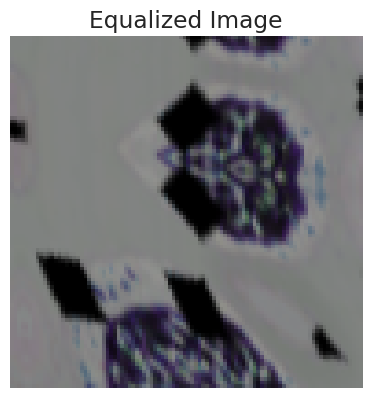

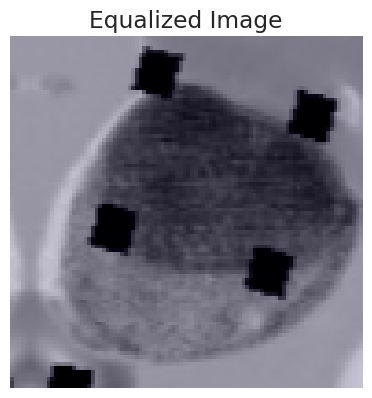

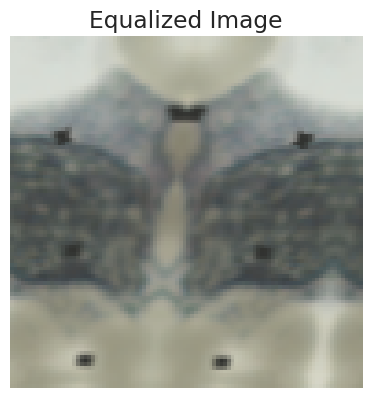

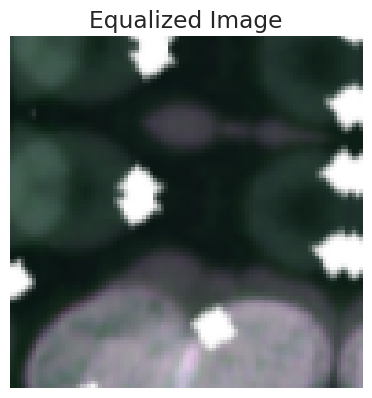

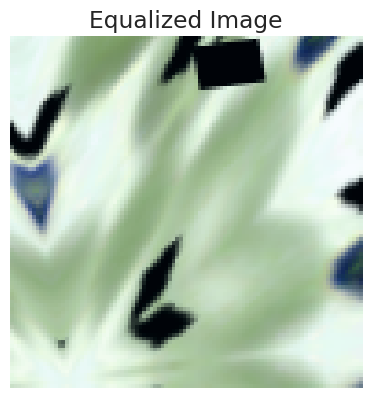

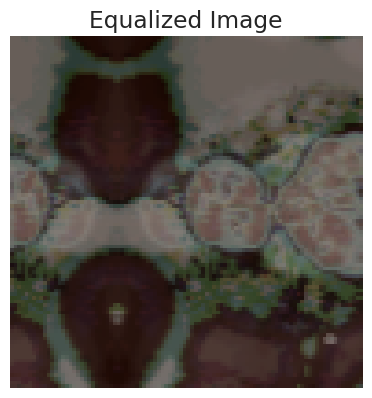

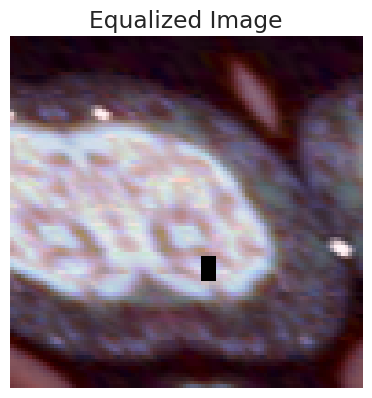

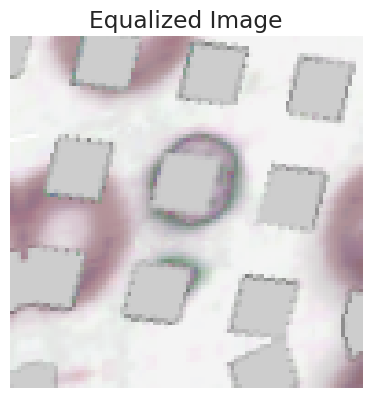

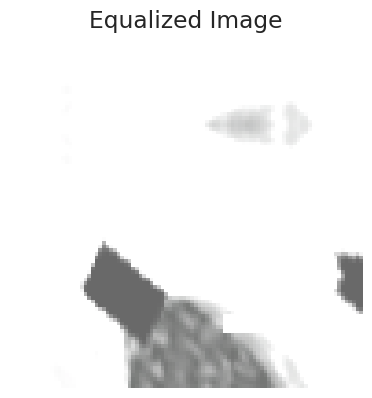

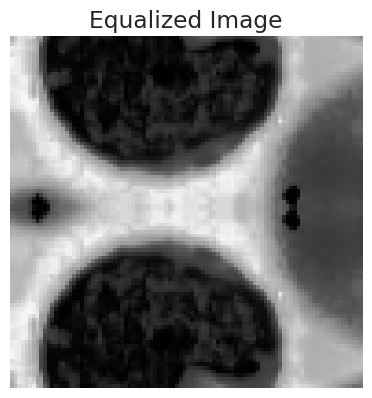

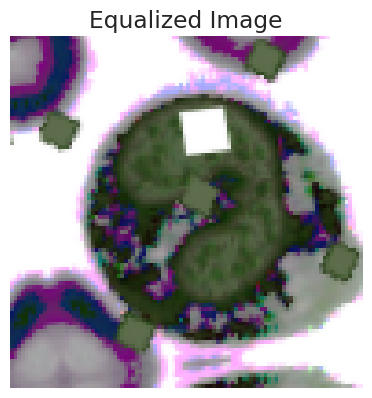

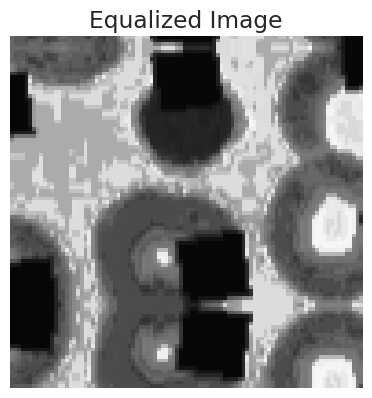

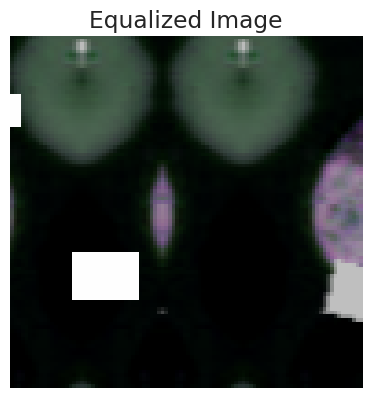

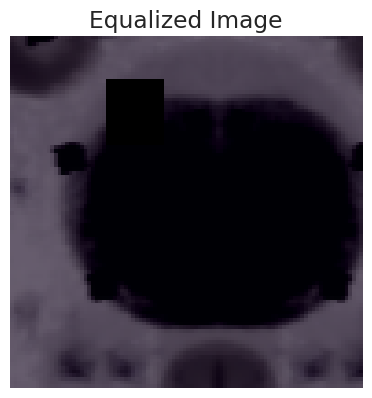

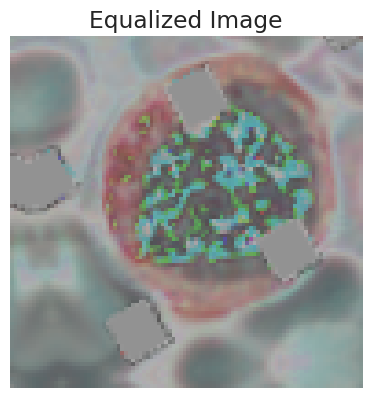

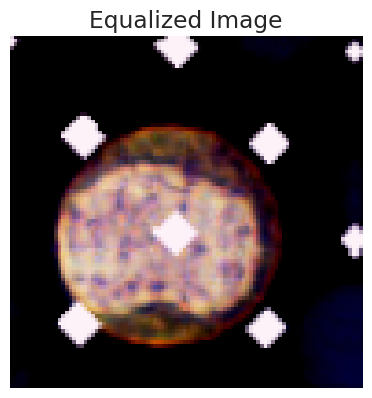

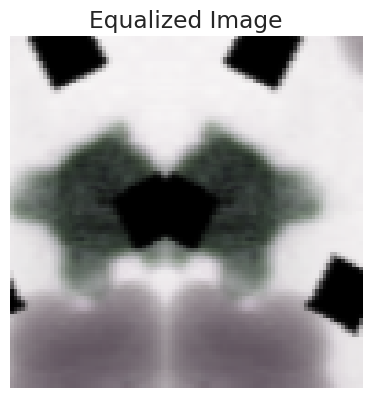

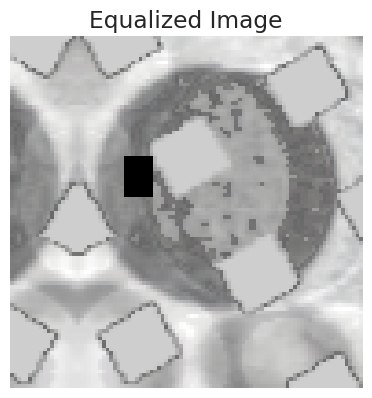

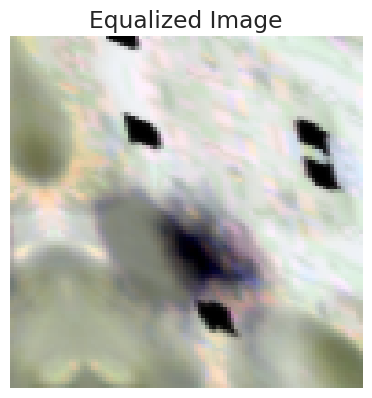

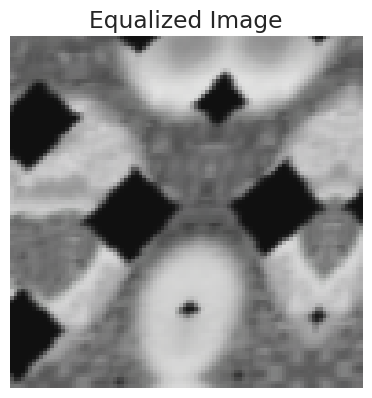

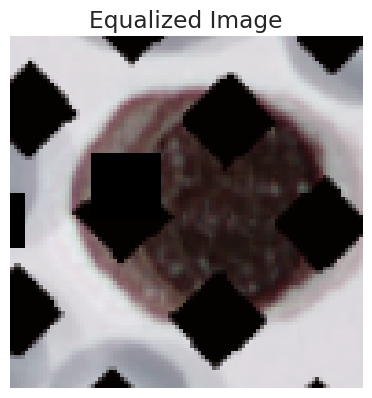

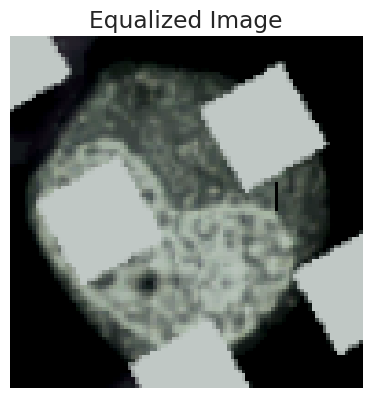

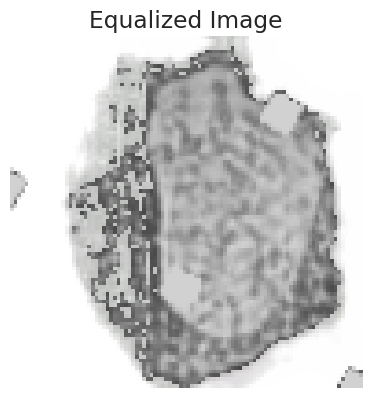

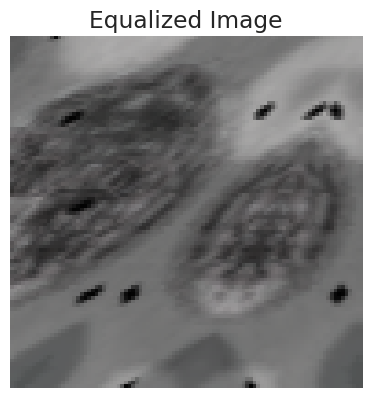

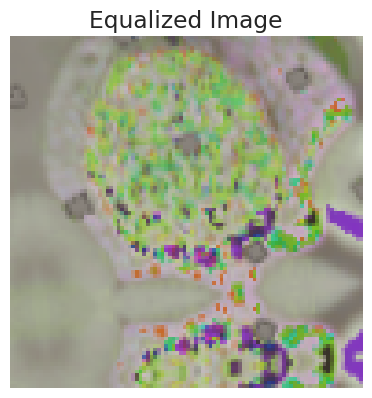

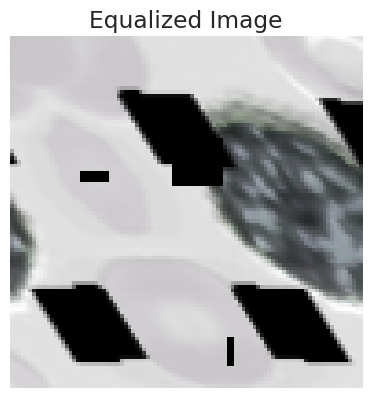

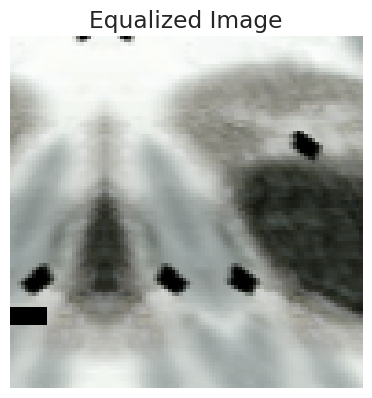

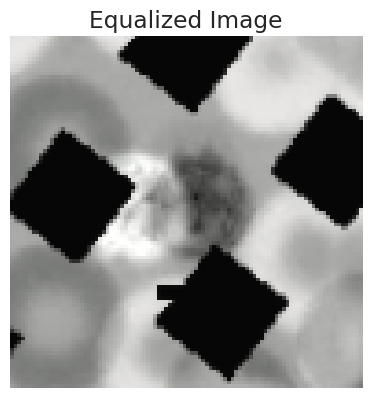

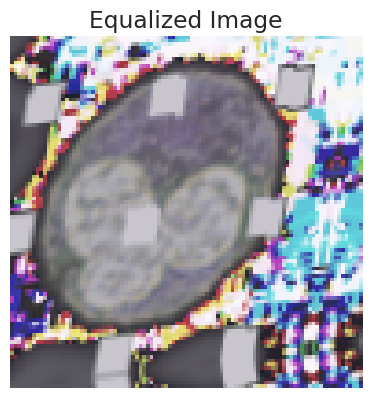

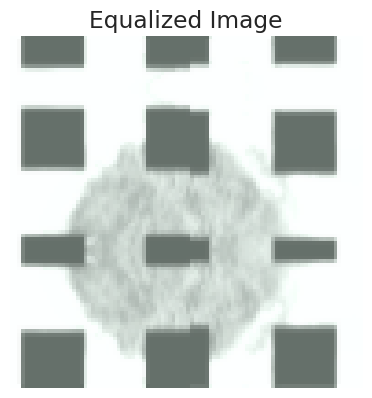

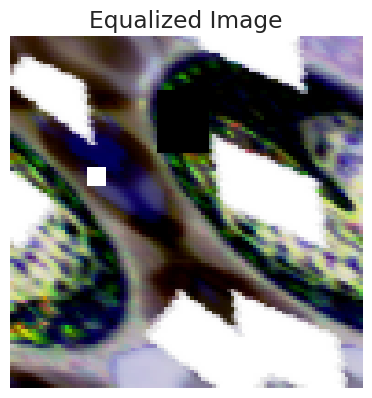

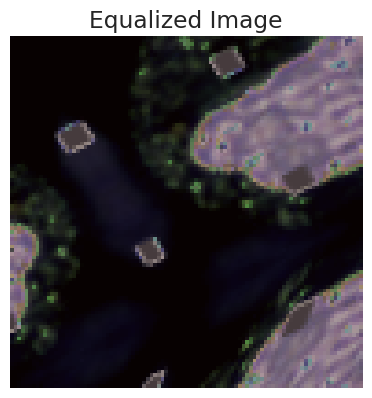

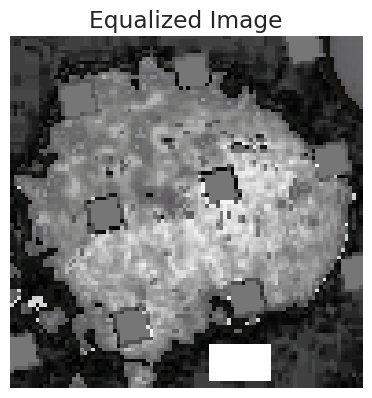

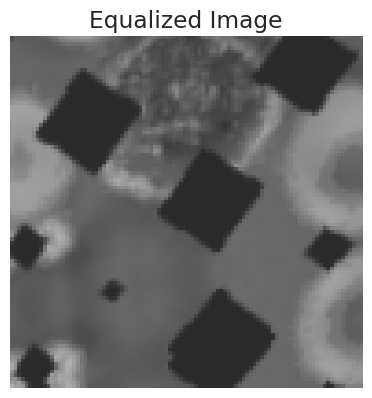

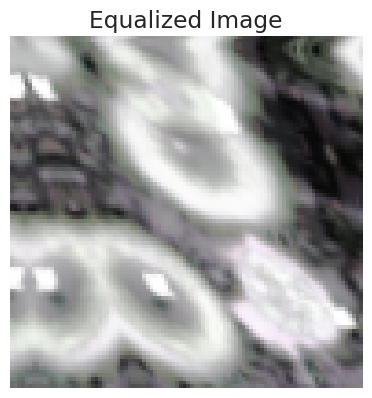

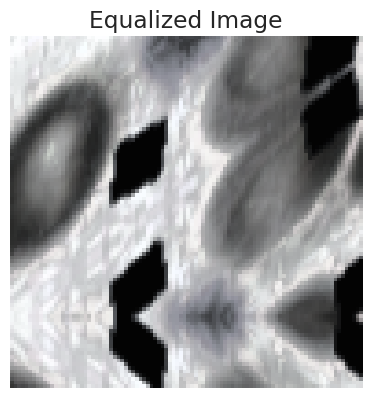

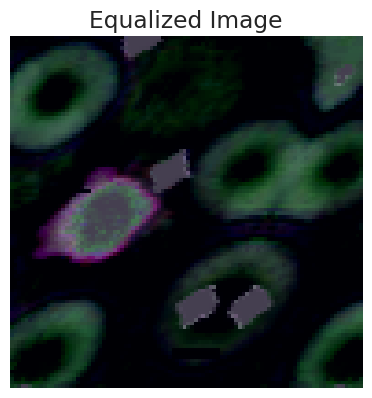

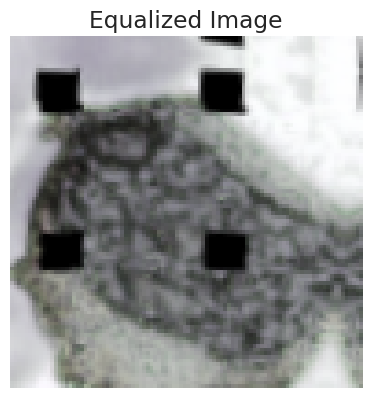

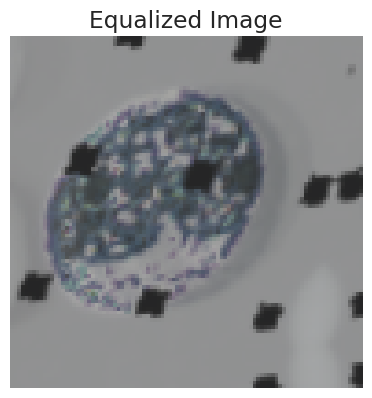

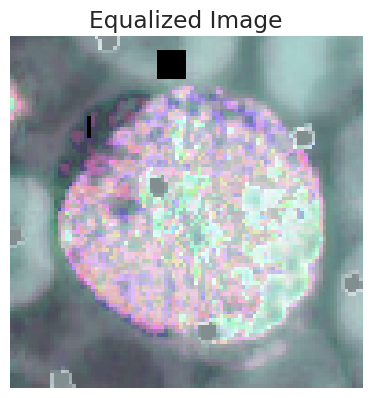

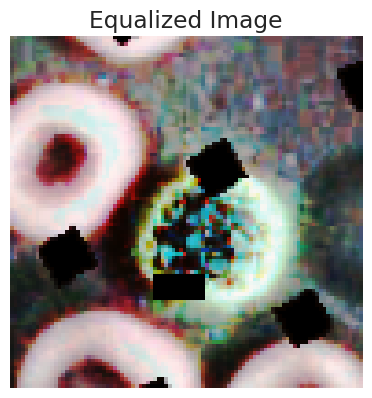

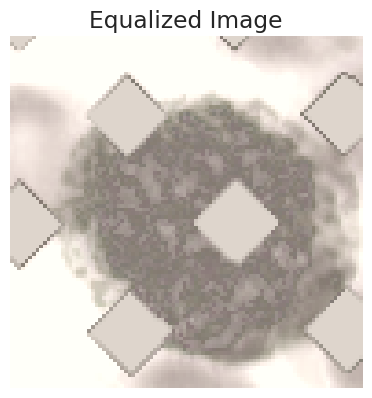

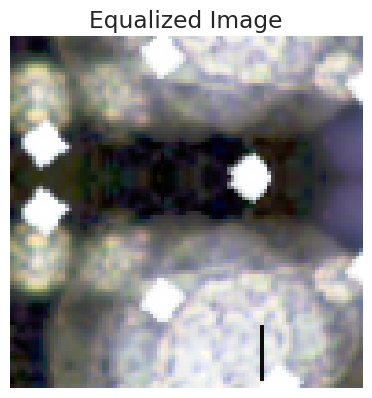

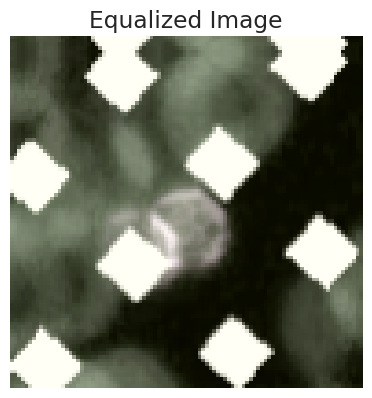

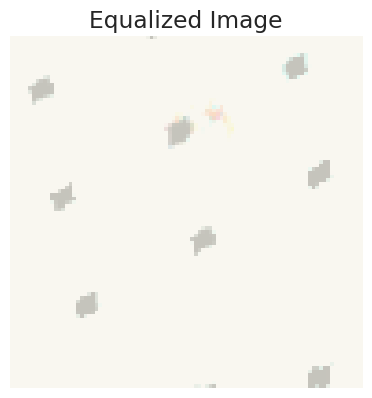

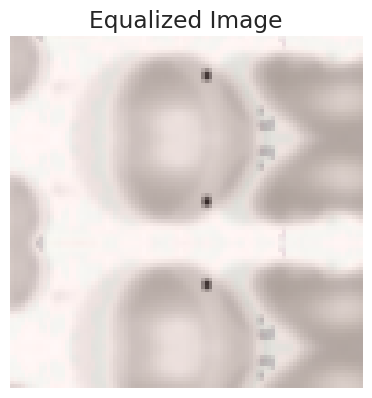

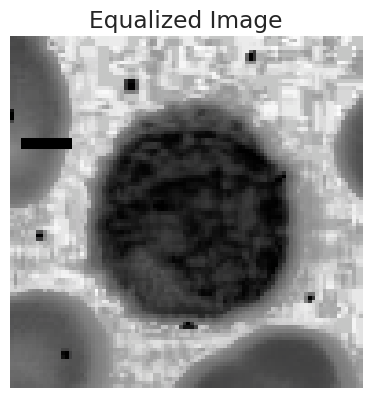

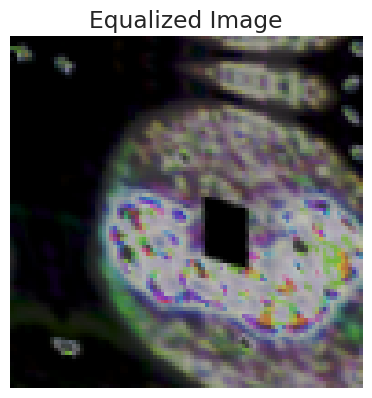

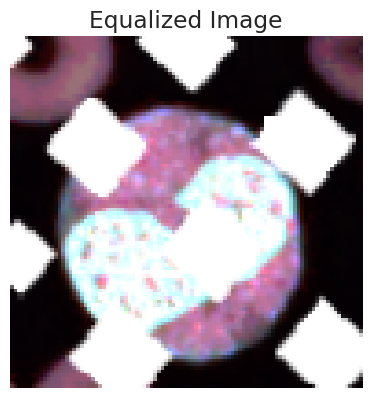

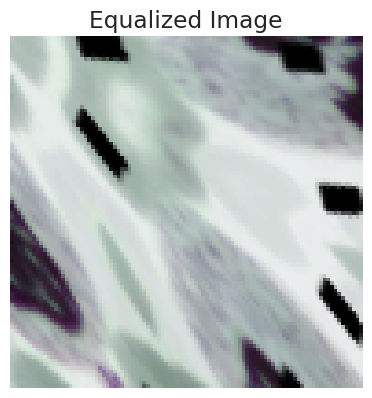

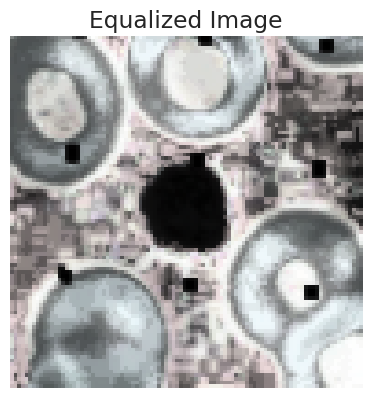

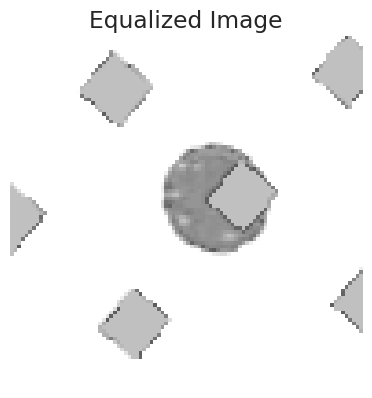

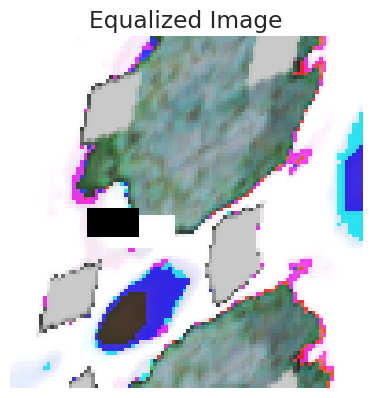

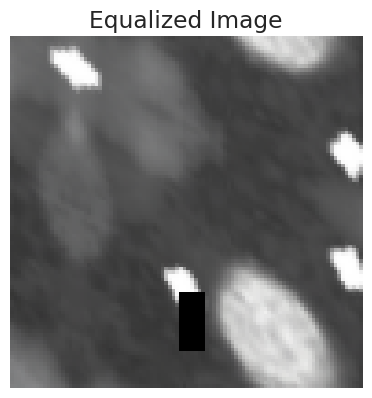

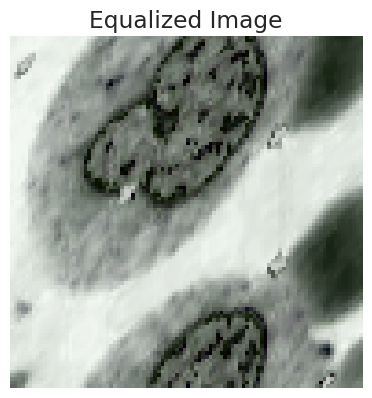

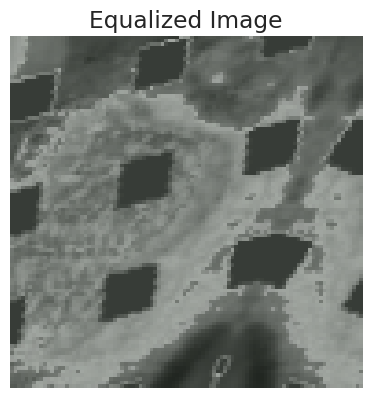

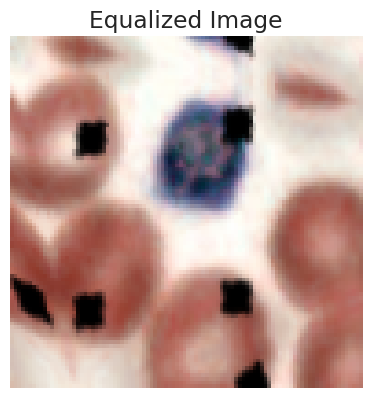

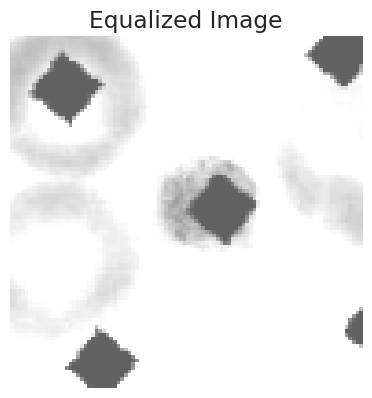

In [55]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import cv2

images = X_test_aug3[:500] # Assuming images are stored under the key 'images'
labels = y_test_aug3[:500]# Assuming labels are stored under the key 'labels'

# Function to apply k-means clustering to an image
def cluster_image(image, n_clusters=5):
    h, w, c = image.shape
    flat_image = image.reshape(-1, c)  # Flatten image to (pixels, channels)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(flat_image)  # Cluster assignment for each pixel
    return labels.reshape(h, w), kmeans.cluster_centers_

def apply_histogram_equalization(image):
    # Ensure the image is in grayscale
    if len(image.shape) == 3:  # If the image has multiple channels (e.g., RGB/BGR)
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        gray = image
    
    # Ensure the image is uint8
    if gray.dtype != np.uint8:
        gray = (gray * 255).clip(0, 255).astype(np.uint8)  # Scale to [0, 255] and convert to uint8
    
    # Apply histogram equalization
    equalized = cv2.equalizeHist(gray)
    
    # Convert back to RGB (optional)
    return cv2.cvtColor(equalized, cv2.COLOR_GRAY2RGB)

def segment_nucleus(image):
    """
    Segments nuclei in the given image.

    Parameters:
    - image (numpy.ndarray): Input image array (H, W, C) in BGR format.

    Returns:
    - segmented_only (numpy.ndarray): Image containing only the segmented nuclei.
    """
    if image is None:
        raise ValueError("Input image is None")

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply stronger noise reduction with median filter
    denoised = cv2.medianBlur(gray, 5)

    # Use adaptive thresholding to handle varying lighting
    thresh = cv2.adaptiveThreshold(
        denoised, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2
    )

    # Use morphological operations to remove small artifacts
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    morphed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # Find contours
    contours, _ = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a mask for segmented nuclei
    mask = np.zeros_like(gray)
    for contour in contours:
        area = cv2.contourArea(contour)
        # Adjust area filter based on expected nucleus size
        if 200 < area < 5000:  # These thresholds can be tuned
            cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)

    # Apply the mask to the original image to extract only the nuclei
    segmented_only = cv2.bitwise_and(image, image, mask=mask)

    return segmented_only

# Function to evaluate clusters in an image using a trained model
def evaluate_clusters(image, image_clusters, cluster_centers, model, confidence_threshold=0.2):
    h, w, c = image.shape
    significant_mask = np.zeros((h, w), dtype=bool)  # Mask to keep significant clusters
    
    for cluster_id in range(len(cluster_centers)):
        # Create a mask for the current cluster
        cluster_mask = (image_clusters == cluster_id)
        
        # Reconstruct the image with only this cluster
        reconstructed_image = np.zeros_like(image)
        reconstructed_image[cluster_mask] = image[cluster_mask]
        
        # Classify the reconstructed image
        prediction = model.predict(reconstructed_image[np.newaxis, ...])  # Add batch dimension
        confidence = np.max(prediction)  # Get max confidence
        
        # If confidence is high, keep this cluster
        if confidence > confidence_threshold:
            significant_mask = significant_mask | cluster_mask
    
    return significant_mask

# Function to reconstruct an image based on the significant mask
def reconstruct_image(image, significant_mask):
    filtered_image = np.zeros_like(image)
    filtered_image[significant_mask] = image[significant_mask]
    return filtered_image

# Apply the pipeline to the dataset
filtered_images = []
filtered_labels = []

for idx, image in enumerate(images):

    '''
    print(f"Processing image {idx+1}/{len(images)}")
    image_clusters, cluster_centers = cluster_image(image, n_clusters=15)  # Adjust n_clusters as needed
    significant_mask = evaluate_clusters(image, image_clusters, cluster_centers, ft_model, confidence_threshold=0.2)
    filtered_image = reconstruct_image(image, significant_mask)
    filtered_images.append(filtered_image)
    filtered_labels.append(labels[idx])  # Keep the original label
    '''

    prediction = ft_model.predict(image[np.newaxis, ...])   # Add batch dimension
    confidence = np.max(prediction)  # Get max confidence
        
        # If confidence is high, keep this cluster
    if confidence > 0.90:
            
            filtered_images.append(image)
            filtered_labels.append(labels[idx]) 
                                   
    else:
        
        print("ko")
        equalized_image = np.clip(image, 0, 255).astype(np.uint8)

        # Plot the original and equalized images
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 2)
        plt.imshow(equalized_image)
        plt.title("Equalized Image")
        plt.axis("off")
        filtered_images.append( apply_histogram_equalization(image))
        filtered_labels.append(labels[idx]) 



# Convert to NumPy arrays
filtered_images = np.array(filtered_images)
filtered_labels = np.array(filtered_labels)

# Generate predictions on the test set and print a classification report
y_pred = ft_model.predict(filtered_images)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels
y_test_classes = filtered_labels.argmax(axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))


### Submit Section


In [ ]:
# file: model.py
class Model:
    def __init__(self):
        """Initialize the internal state of the model."""

    def predict(self, X):
        """Return a numpy array with the labels corresponding to the input X."""

In [ ]:
%%writefile model.py
import numpy as np

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
class Model:
    def __init__(self):
        """
        Initialize the internal state of the model. Note that the __init__
        method cannot accept any arguments.

        The following is an example loading the weights of a pre-trained
        model.
        """
        self.neural_network = tfk.models.load_model('Blood_Cells_MobileNetV3S_97.58.keras')

    def predict(self, X):
        """
        Predict the labels corresponding to the input X. Note that X is a numpy
        array of shape (n_samples, 96, 96, 3) and the output should be a numpy
        array of shape (n_samples,). Therefore, outputs must no be one-hot
        encoded.

        The following is an example of a prediction from the pre-trained model
        loaded in the __init__ method.
        """
        preds = self.neural_network.predict(X)
        if len(preds.shape) == 2:
            preds = np.argmax(preds, axis=1)
        return preds

In [ ]:
from datetime import datetime
filename = f'Outputs/submission_{datetime.now().strftime("%y%m%d_%H%M%S")}.zip'

# Add files to the zip command if needed
# The original path was incorrect. Using f-string to format correctly.
!zip {filename} model.py Blood_Cells_MobileNetV3S_97.58.keras